<center>
<img src="https://repository-images.githubusercontent.com/286819592/b82e14cf-3c85-4f91-84c0-bea095c353a8" width=800 height=500 />
</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading](#3)
    - [3.1 Basic Understanding](#3.1)
    - [3.2 Data clearning](#3.2)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.2 Feature Distribution of Continous Features](#4.2)
    - [4.3 Feature Distribution of Categorical Features](#4.3)
    - [4.4 Target Distribution ](#4.4)
    - [4.5 Correlation Matrix ](#4.5)
- [5. Data Pre-Processing](#5)    
- [6. Modeling](#6)
    - [6.1 Linear Regression](#6.1)
    - [6.2 Ridge Regression](#6.2)
    - [6.2 Lasso Regression](#6.2)
- [7. Conclution](#7)   

<a id="1"></a>
# **<center><span style="color:#00BFC4;">Introduction  </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Car Price Prediction:</u></b><br>
 
The automobile market in Cambodia has been growing rapidly in recent years, with an increasing number of car buyers seeking to purchase new and used cars. As a result, there has been a growing interest in determining the factors that influence car prices in Cambodia. In this study, we aim to explore the relationship between various car features and their impact on car prices in the Cambodian market.

To achieve this goal, we collected data on car prices and features from Khmer24, one of the largest online marketplaces for cars in Cambodia. We scraped the data and compiled a dataset containing information on various car features such as make, model, year, and transmission type, as well as their corresponding prices.
</div>

<a id="2"></a>
# **<center><span style="color:#00BFC4;">Imports  </span></center>**

In [1]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

In [2]:
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm 

In [132]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error



from sklearn.pipeline import Pipeline

In [3]:
RANDOM_STATE = 12 
FOLDS = 5
STRATEGY = 'median'

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go 
pd.options.display.float_format = '{:.4f}'.format
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno

from IPython.display import clear_output
# !pip3 install -U lazypredict
# !pip3 install -U pandas #Upgrading pandas

clear_output()

In [5]:
def check_column_value(df, value):
    """
    Checks if each column in a pandas DataFrame contains a specific value and prints the column names that contain the value.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check.
        value (any type): The value to look for in each column.
    """
    if type(value) != str:
        values = list(value)
    elif type(value) == list():
        values = value
    else: values = [value]
    matching_columns = df.apply(lambda col: col.isin(values).any())
    matching_columns = matching_columns[matching_columns == True]
    count = {}
    index = set()
    for value in values:
        for col in matching_columns.index.tolist():
            if count == {}:
                count[col] = []
            elif col not in count:
                count[col] = []
            
            count[col].append(df[df[col] == value].loc[:, col].count())
            for i in df[df[col] == value].loc[:, col].index.tolist():
                index.add(i)
  
    print(f"\033[94mColumns that contain the {values}:\n")
    print(pd.Series(count))
    
    return index
    

In [131]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);

In [6]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="Price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["Price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="Price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [7]:
def insight_range_price(car_make_Budget, car_model_Budget, df_Budget, range_price):
    print(f'\033[94m')
    print(f'The total number of Car brands and Car models in range of {range_price} prices',df_Budget.shape[0])
    print(f'The total number of Car brands in range of {range_price} prices', len(car_make_Budget))
    print(f'The total number of Car models in range of {range_price} prices', len(car_model_Budget))

In [8]:
def dummy(new_df, categorical_features, threshold=None):
    if threshold is None:
        threshold = np.max(new_df[categorical_features].nunique().values.tolist())
    cat_feature = [feature for feature in categorical_features if new_df[feature].nunique() <= threshold]
    df_dummy = pd.get_dummies(columns=cat_feature, data=new_df)
    return df_dummy, cat_feature

def scaler_df(df, numerical_features):
    scaler = StandardScaler()
    numerical_features = scaler.fit_transform(df[[numerical_features]])
    return numerical_features

In [9]:
# from scipy import stats
from scipy import *

def boxcox(new_df, col):

    # Box-Cox transformation
    transformed_data, lambda_param = stats.boxcox(new_df[col])

    Boxcox = pd.Series(transformed_data)
    
    t=sns.distplot(Boxcox,label="Skewness: %.2f"%(Boxcox.skew()) )
    t.legend()
    return Boxcox, lambda_param

In [93]:
# Creat function to transform
def scaler_df(df, numerical_features):
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    return df

In [11]:
# func to Interquartile Range Method
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [12]:
def visulize_outlier(df, col):
    out_iqr(df, col)
    plt.figure(figsize = (10,6))
    sns.distplot(df[col], kde=False)
    plt.axvspan(xmin = lower,xmax= df.Price.min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df.Price.max(),alpha=0.2, color='red')
    plt.show()

In [13]:
def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    upper_end = Q3+1.5*IQR
    lower_end = Q1 - 1.5*IQR
    outlier = df[(df>upper_end) | (df<lower_end)]
    return outlier

In [14]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [15]:
Algorithms = {'Training Score': [],
        'Testing Score' : [],
        'Algorithms': []
        }
def model_prediction(x_train, x_test, y_train, y_test, model, name, record = False):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    a = r2_score(y_train,y_train_pred)*100
    b = r2_score(y_test,y_test_pred)*100
    
    if record:
        Algorithms['Algorithms'].append(name)
        Algorithms['Training Score'].append(a)
        Algorithms['Testing Score'].append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"MSE of {model} model on Testing Data is:", mean_squared_error(y_test_pred, y_test))

In [16]:
def visualize_linear_features_importance(x_train, y_train, lm):
    lm.fit(x_train, y_train)

    df_importance_l_d = pd.DataFrame()
    df_importance_l_d['Features'] = x_train.columns
    df_importance_l_d['Score'] = lm.coef_

    plt.figure(figsize = (15, 6))

    sns.barplot(x= 'Features', y = 'Score', data = df_importance_l_d )
    plt.xticks(rotation = 90)
    plt.show()
    

In [17]:
def feature_selection_REF(X_train, y_train, lm, n_features_to_select):
    # Running RFE with the output number of the variable equal to 8
    lm.fit(X_train, y_train)

    rfe = RFE(lm, n_features_to_select=n_features_to_select)             
    rfe = rfe.fit(X_train, y_train)

    col_sup = X_train.columns[rfe.support_]
    col_sup
    
    # Creating X_train dataframe with RFE selected variables

    X_train_rfe = X_train[col_sup]
    
    # Selecting the variables which are in support
#     print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
#     print('\n')
#     print(X_train_rfe.columns.tolist())
    
    return X_train_rfe

In [18]:
def ODL_checking(X_train_rfec, y_train):
    X_train_rfec = sm.add_constant(X_train_rfec)
    lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

    #Summary of linear model
    print(lm_rfe.summary())
    return lm_rfe

In [19]:
def drop_high_pvalue_features(X, y, alpha=0.05):
    """
    Drops one feature at a time based on the p-value until all p-values are less than or equal to the specified alpha level.
    
    Parameters:
        X (pandas DataFrame): The DataFrame to check for high p-values.
        alpha (float): The alpha level above which features will be dropped. Default is 0.05.
    
    Returns:
        pandas DataFrame: The DataFrame with high p-value features dropped.
    """
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Iterate until all p-values are less than or equal to the alpha level
    while results.pvalues.max() > alpha:
        # Drop the feature with the highest p-value
        drop_feature = results.pvalues.idxmax()
        X = X.drop(columns=[drop_feature], axis = 'columns')
        # Fit a new OLS model with the remaining features
        model = sm.OLS(y, X)
        results = model.fit()
    
    return X

In [20]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="Price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

In [21]:
def drop_high_vif_features(features, vif_thresh=5):
    """
    Drops one feature at a time based on the VIF value until all VIF values are less than or equal to the specified threshold.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check for high VIF values.
        vif_thresh (float): The threshold VIF value above which features will be dropped. Default is 5.
    
    Returns:
        pandas DataFrame: The DataFrame with high VIF features dropped.
    """
    vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    # Iterate until all VIF values are less than or equal to the threshold
    while vifs.max() > vif_thresh:
        # Drop the feature with the highest VIF value
        drop_feature = vifs.idxmax()
        features = features.drop(columns=[drop_feature])
        
        # Re-calculate VIF values for remaining features
        vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    return features

In [22]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif = vif.reset_index(drop = True)
    return vif

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="3"></a>
<span style="color:#00BFC4;">Data Loading</span>
</p>
</div>

In [23]:
# Read data
cars = pd.read_csv('Car_Kh24.csv')
cars.head(3)

Ad ID       Category   Locations     Posted  Car Makes     Car Model  \
0  9539303  Cars for Sale  Phnom Penh  10-Jun-23    Toyota    Highlander   
1  9529408  Cars for Sale  Phnom Penh  09-Jun-23     Lexus            NX   
2  9540392  Cars for Sale  Phnom Penh  09-Jun-23    Toyota  Land Cruiser   

       Year      Tax Type Condition Body Type    Fuel Transmission  Color  \
0 2003.0000  Plate Number      Used    Sports  Petrol         Auto  Black   
1 2015.0000     Tax Paper      Used       NaN  Petrol         Auto  White   
2 2022.0000  Plate Number      Used       SUV  Petrol         Auto  Black   

                                                Link  \
0  https://www.khmer24.com/en/cars/highlander-%E1...   
1  https://www.khmer24.com/en/cars/lexus-nx200t-2...   
2  https://www.khmer24.com/en/cars/%E1%9E%9B%E1%9...   

                                             Title     Price  
0  Highlander ឆ្នាំ 2003 ម៉ាសុីន 4 ប៉ុង 1 ពណ័ ខ្មៅ   $14,000  
1                           Lexus NX200T 2015 គុជ3   $39,500  
2                            លក់ Land Cruiser 2022  $155,000

*Feature descriptions:*
>* **Ad ID**-The unique of cars in website khmer 24
>* **Category**- The type of cars in the website indicate for sale.
>* **Posted**- The date of this cars post in this website.
>* **Car Makes**- The brand of cars.
>* **Car Model**- The model of cars.
>* **Year**-The year that car create.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Data
</p>
</div>

### 1. Checking Dimensions of the Data. 

In [24]:
cars.shape

(17873, 16)

#### Observation
1. From the above output we can say that there are **17873 rows/records** and **16 columns/Features** present in our dataset

### 2. Checking the basic information of dataset. 

In [25]:
# Check some infomation
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17873 entries, 0 to 17872
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ad ID         17873 non-null  int64  
 1   Category      17873 non-null  object 
 2   Locations     17873 non-null  object 
 3   Posted        17873 non-null  object 
 4   Car Makes     17870 non-null  object 
 5   Car Model     17750 non-null  object 
 6   Year          17871 non-null  float64
 7   Tax Type      17873 non-null  object 
 8   Condition     17873 non-null  object 
 9   Body Type     14215 non-null  object 
 10  Fuel          15712 non-null  object 
 11  Transmission  16387 non-null  object 
 12  Color         17685 non-null  object 
 13  Link          17873 non-null  object 
 14  Title         17873 non-null  object 
 15  Price         17873 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 2.2+ MB


#### Observation
1. From above output we can observe that **14 categorical** & **2 numerical** Attributes.
2. Some feature is not correct data type. So we need to change.
3. By checking information we can see that there are some values was missing in some features

### 3. Checking NaN vaues in our Dataset 

In [26]:
# check missing values
print(f'\033[94m')
print(cars.isnull().sum())


Ad ID              0
Category           0
Locations          0
Posted             0
Car Makes          3
Car Model        123
Year               2
Tax Type           0
Condition          0
Body Type       3658
Fuel            2161
Transmission    1486
Color            188
Link               0
Title              0
Price              0
dtype: int64


#### Observation
> We have observe that **Car model**, **Year**, **Body Type**, **Fuel**, **Transmission**, and **Color** features are contain missing values. How we deal with these values will be very important.

In [27]:
feature_has_missing_values = [feature for feature in cars.columns if cars[feature].isnull().any()]
missing_values = [cars[feature].isnull().sum() for feature in feature_has_missing_values+['None missing'] if feature !='None missing']+[cars.shape[0]-cars.isnull().sum().sum()]

data = go.Pie(labels=feature_has_missing_values+['None missing'], values= missing_values)
layout = go.Layout(title='Missing values With none missing values')

fig = go.Figure(data=data, layout=layout)
fig.show()

### 4. Checking Duplicate Values. 

In [28]:
print('\033[94mDuplicate Values =',cars.duplicated().sum())

Duplicate Values = 6


#### Observation
>From the above output we can say that there is **6 duplicate** records present in our dataset.

In [29]:
# Handling duplicate values
cars.drop_duplicates(inplace= True)

### 5. Showing Only Categorical Features. 

In [30]:
df_categorical = cars.select_dtypes(include='object')
df_categorical.head(3)

Category   Locations     Posted  Car Makes     Car Model      Tax Type  \
0  Cars for Sale  Phnom Penh  10-Jun-23    Toyota    Highlander  Plate Number   
1  Cars for Sale  Phnom Penh  09-Jun-23     Lexus            NX     Tax Paper   
2  Cars for Sale  Phnom Penh  09-Jun-23    Toyota  Land Cruiser  Plate Number   

  Condition Body Type    Fuel Transmission  Color  \
0      Used    Sports  Petrol         Auto  Black   
1      Used       NaN  Petrol         Auto  White   
2      Used       SUV  Petrol         Auto  Black   

                                                Link  \
0  https://www.khmer24.com/en/cars/highlander-%E1...   
1  https://www.khmer24.com/en/cars/lexus-nx200t-2...   
2  https://www.khmer24.com/en/cars/%E1%9E%9B%E1%9...   

                                             Title     Price  
0  Highlander ឆ្នាំ 2003 ម៉ាសុីន 4 ប៉ុង 1 ពណ័ ខ្មៅ   $14,000  
1                           Lexus NX200T 2015 គុជ3   $39,500  
2                            លក់ Land Cruiser 2022  $155,000

### 6. Showing only the Numerical Features. 

In [31]:
df_numerical = cars.select_dtypes(exclude='object')
df_numerical.head(3)

Ad ID       Year
0  9539303 2003.0000
1  9529408 2015.0000
2  9540392 2022.0000

### 7. Cardinality of Features.

In [32]:
print('\033[94m',cars.nunique())

 Ad ID           17867
Category            1
Locations          25
Posted             32
Car Makes          66
Car Model         515
Year               43
Tax Type            2
Condition           2
Body Type           9
Fuel                5
Transmission        2
Color              14
Link            17867
Title           15394
Price            1723
dtype: int64


### 8. Descriptive Statistics Analysis.

In [33]:
cars.describe(include='object')

Category   Locations     Posted  Car Makes Car Model  \
count           17867       17867      17867     17864     17744   
unique              1          25         32        66       515   
top     Cars for Sale  Phnom Penh  10-Jun-23    Toyota     Prius   
freq            17867       15037       6298      8896      2918   

            Tax Type Condition Body Type    Fuel Transmission  Color  \
count          17867     17867     14211   15709        16382  17679   
unique             2         2         9       5            2     14   
top     Plate Number      Used       SUV  Petrol         Auto  White   
freq           13241     13908      5481   10061        15443   7350   

                                                     Link   Title    Price  
count                                               17867   17867    17867  
unique                                              17867   15394     1723  
top     https://www.khmer24.com/en/cars/highlander-%E1...  ឡានលក់  $12,500  
freq                                                    1     646      255

> We will need to transform the data to be numeric (int64 or float64) so that we can train machine learning models. These models (in general) don't work on text.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '3.1'><span>Data Cleaning</span></a>
</p>
</div>

### 1. Cleaning the Price Feature. 

In [34]:
cars['Price'] = cars['Price'].apply(lambda x: x.split('$')[1].replace(',', '')).astype(float)
cars['Price'].dtype

dtype('float64')

### 2. Handling Missing Values

#### Listwise Deletion/ Droping rows 

In [35]:
df = cars.dropna(subset=feature_has_missing_values, how='any')
print('\033[94m',df.isnull().sum())

 Ad ID           0
Category        0
Locations       0
Posted          0
Car Makes       0
Car Model       0
Year            0
Tax Type        0
Condition       0
Body Type       0
Fuel            0
Transmission    0
Color           0
Link            0
Title           0
Price           0
dtype: int64


In [36]:
cars.shape, df.shape

((17867, 16), (13037, 16))

### 3. Cleaning the 'Year' Feature 

In [37]:
df['Year'] = df['Year'].astype(int)

In [38]:
df.Year.dtype, df.shape

(dtype('int32'), (13037, 16))

### 4. Detect unkown values 

In [39]:
index = check_column_value(df, ['Other', 'Other - ផ្សេងៗ'])

Columns that contain the ['Other', 'Other - ផ្សេងៗ']:

Car Model     [0, 53]
Body Type    [920, 0]
Color        [274, 0]
dtype: object


In [40]:
df = df.drop(index, axis='rows')

In [41]:
df.shape

(11859, 16)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id ='4'><span>Exploratory Data Analysis (EDA)</span></a>
</p>
</div>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.1"></a>
## <span style="color:#e76f51;"> Overview of Data </span>

In [42]:
df.iloc[:, 1:].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.5"></a>
## <span style="color:#e76f51;">  Target Distribution </span>

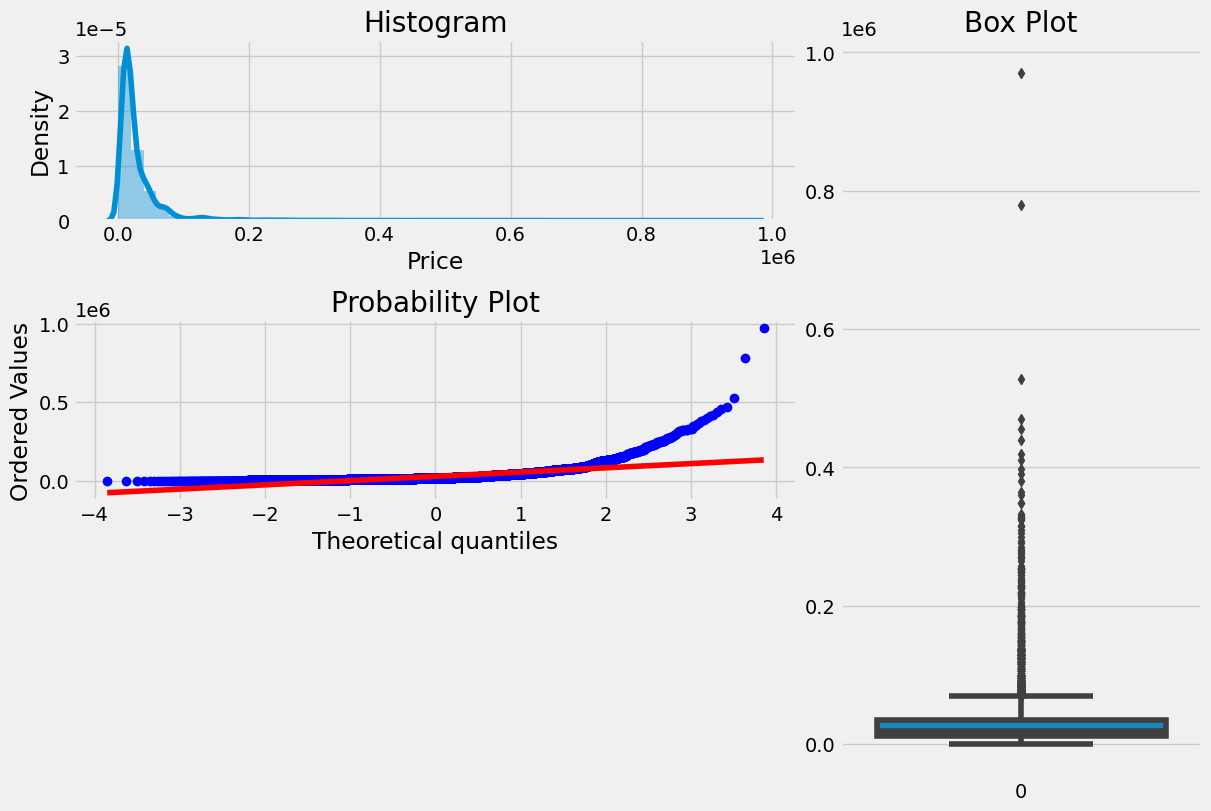

In [133]:
plotting_3_chart(df, 'Price')

In [44]:
df['Price'].agg(['min', 'mean', 'median','max','std', 'skew']).to_frame().T

min       mean     median         max        std   skew
Price 500.0000 29089.7053 18500.0000 970000.0000 36209.9578 6.1635

#### Insights
1. We can clearly observe that our **Car Price Feature** is hiighly right skew and can be problematic for some machine learning algorithms, as they can lead to **biased models** and inaccurate predictions.
2. We can clearly observe there is a significant difference between **mean** & **median values**.
3. We can also that the **skewness of the car price is above 1.5** which mean that the data point are **highly spreed.**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
## <span style="color:#e76f51;">  Feature Distribution of Categorical Features </span>

### 2. Visualizing Total No. of cars sold by different company. 

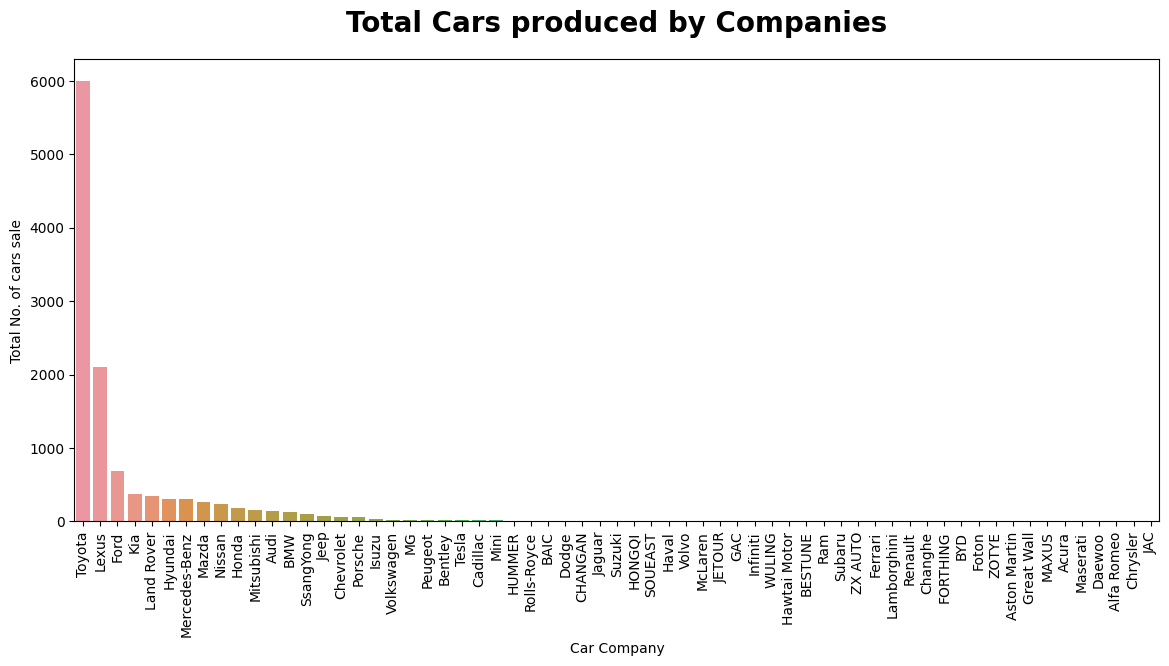

In [45]:
plt.figure(figsize = (14, 6))
counts = df['Car Makes'].value_counts()
sns.barplot(x = counts.index, y = counts.values)
plt.xlabel('Car Company')
plt.ylabel('Total No. of cars sale')
plt.title('Total Cars produced by Companies', pad = 20, fontweight = 'black', fontsize = 20 )
plt.xticks(rotation = 90)
plt.show()

In [46]:
df_brand = pd.DataFrame(df['Car Makes'].value_counts())

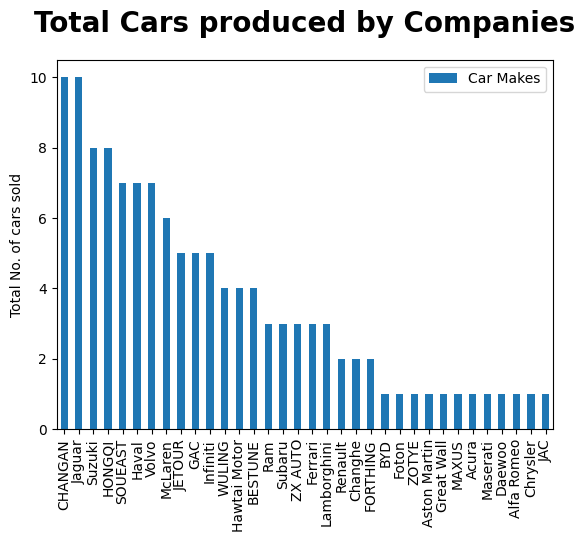

In [47]:
df_brand[df_brand['Car Makes']<= 10].plot(kind = 'bar')
plt.ylabel('Total No. of cars sold')
plt.title('Total Cars produced by Companies', pad = 20, fontweight = 'black', fontsize = 20 )
plt.show()

#### Insights
1. **Toyota** company has sale the highest number of cars.
2. So we can say that **Toyota** is kind of customers most favoured campany.
3. **MAXUS, Chrysler, Alfa Romeo, Acura, ZOTYE, BYD, and Aston Martin** are having very low data-points. So we can't make any inference of least salse car companies.

### 3. Visualizing Car Company with Price. 

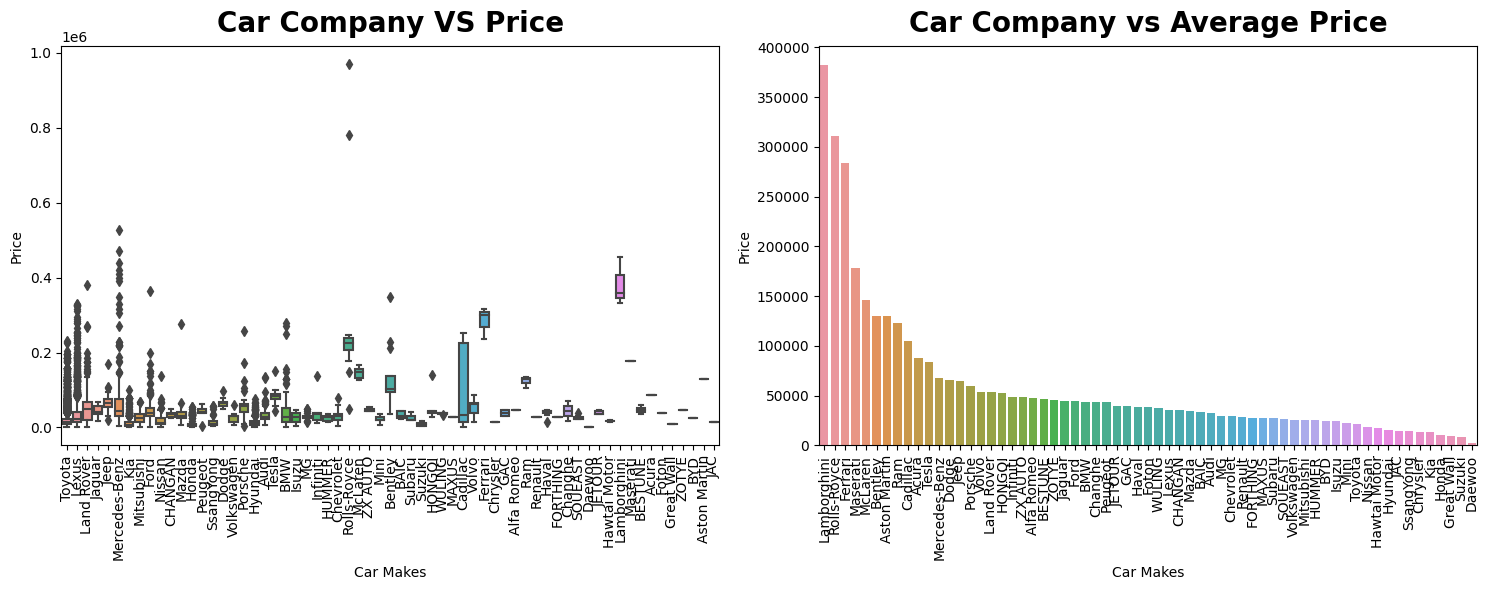

In [48]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Car Makes', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.title('Car Company VS Price', pad = 10, fontweight = 'black', fontsize = 20)

plt.subplot(1, 2, 2)
x = pd.DataFrame(df.groupby('Car Makes')['Price'].mean().sort_values(ascending = False))
sns.barplot(x = x.index, y = 'Price', data = x)
plt.xticks(rotation = 90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

#### Insights
1. **Lamborghini, Farrari, and Rolls-Royce** seems to have price range cars.
2. Car campanies like **Daewoo** & **Suzuki** are having a little bit in our dataset.
3. So we can't make any inference related to lowest price range car companies.

#### Note
- Sine there are too many categories in car company feature. So we can derive a new feature **Campany Price Range** which will show the price range as **Low Range, Medium Range, Hight Range**.

### 4. Visualizing Car Fuel Type Feature 

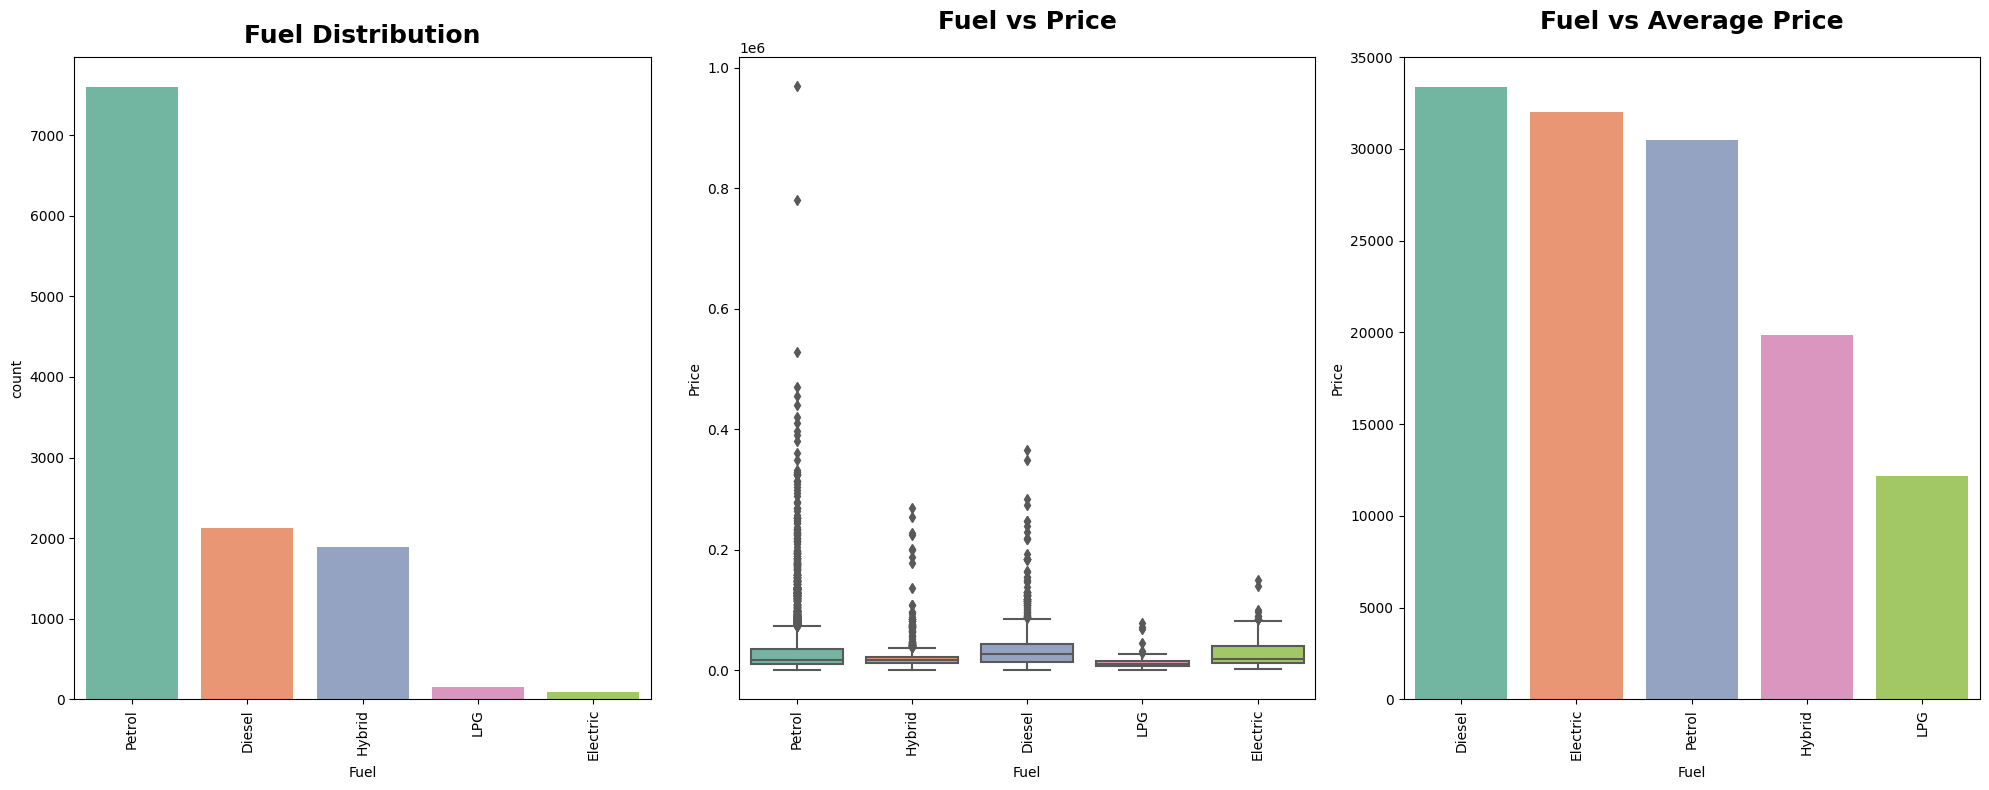

In [49]:
categorical_visualization("Fuel")

#### Insights
1. We can clearly make an insight that **Cars having petrol fuel systme** is mostly sold.
2. From the second plot we can make insight that **Petrol Fuel System cars** are availabe within every **price range**.
3. From the third plot we can make an insight the **Average price of petrol fuel type cars are less than diesl fuel type cars**.

### 5. Visualizing Tax Type 

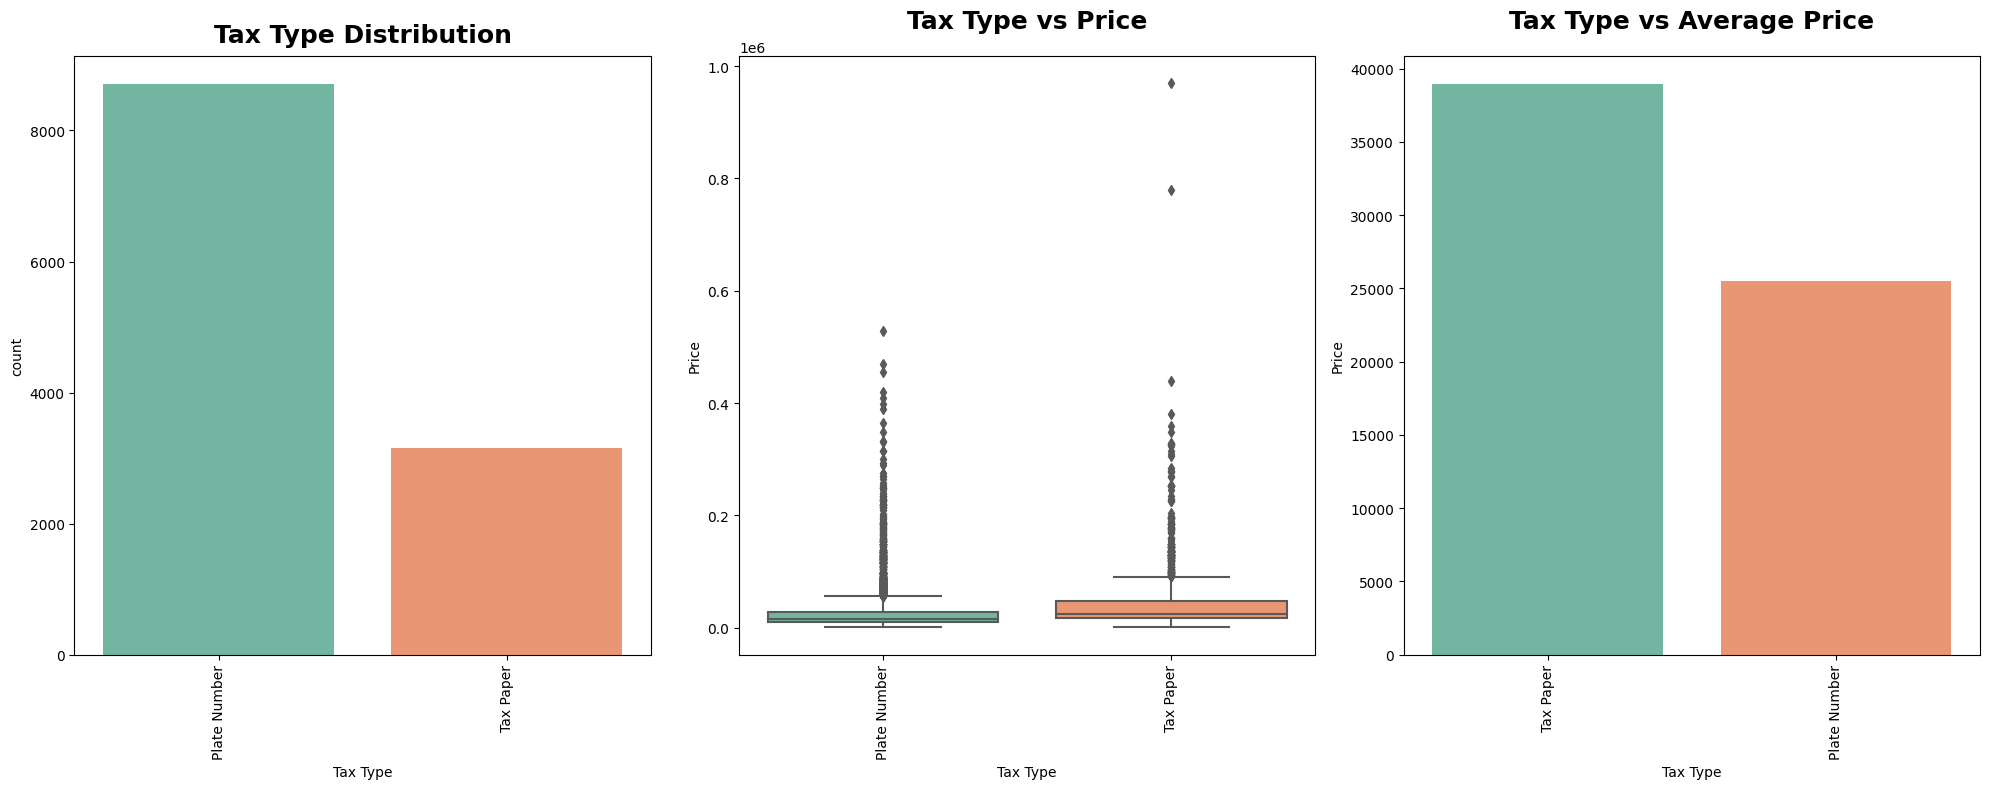

In [50]:
categorical_visualization('Tax Type')

#### Observation
1. Cars **Plate Number** are mostly sale when compared with cars **Tax Paper**.
2. Cars **Tax Paper** are more expansive than Cars **Plate Number**.

#### Insights
1. Outliers present in both.

### 6. Visualizing  Conditon Feature

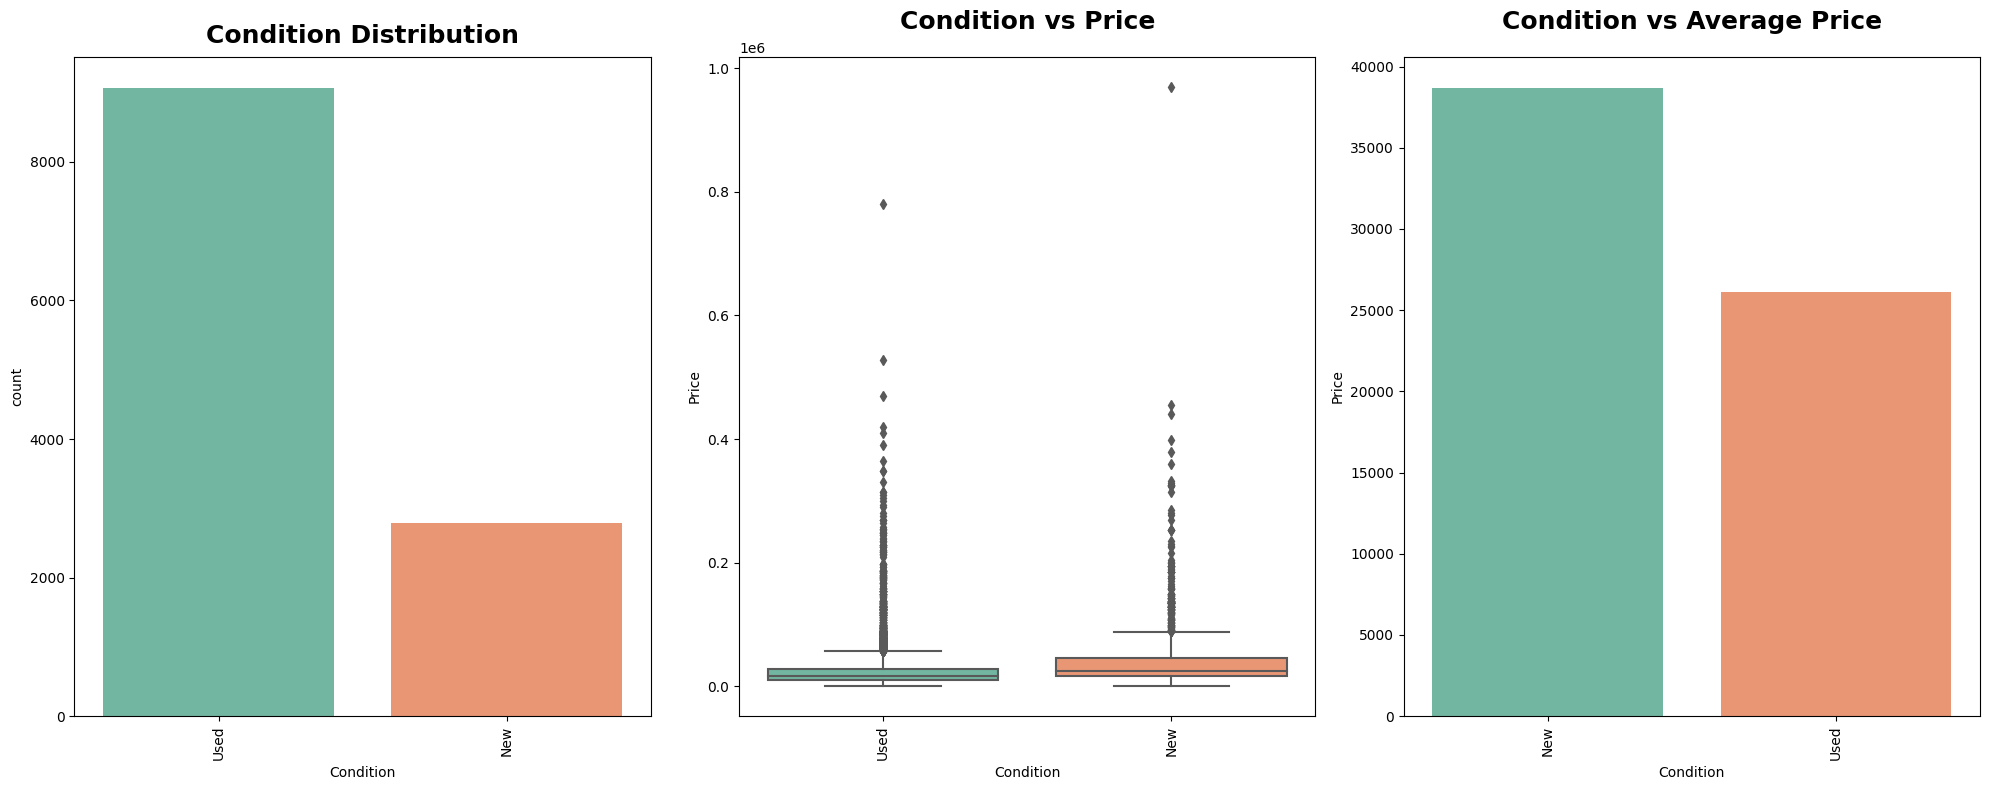

In [51]:
categorical_visualization('Condition')

#### Observation
1. The website has **cars used** more than **cars new**
2. **Cars New** are higher average price than **Car used**

### 7. Visualizing Body Type Feature

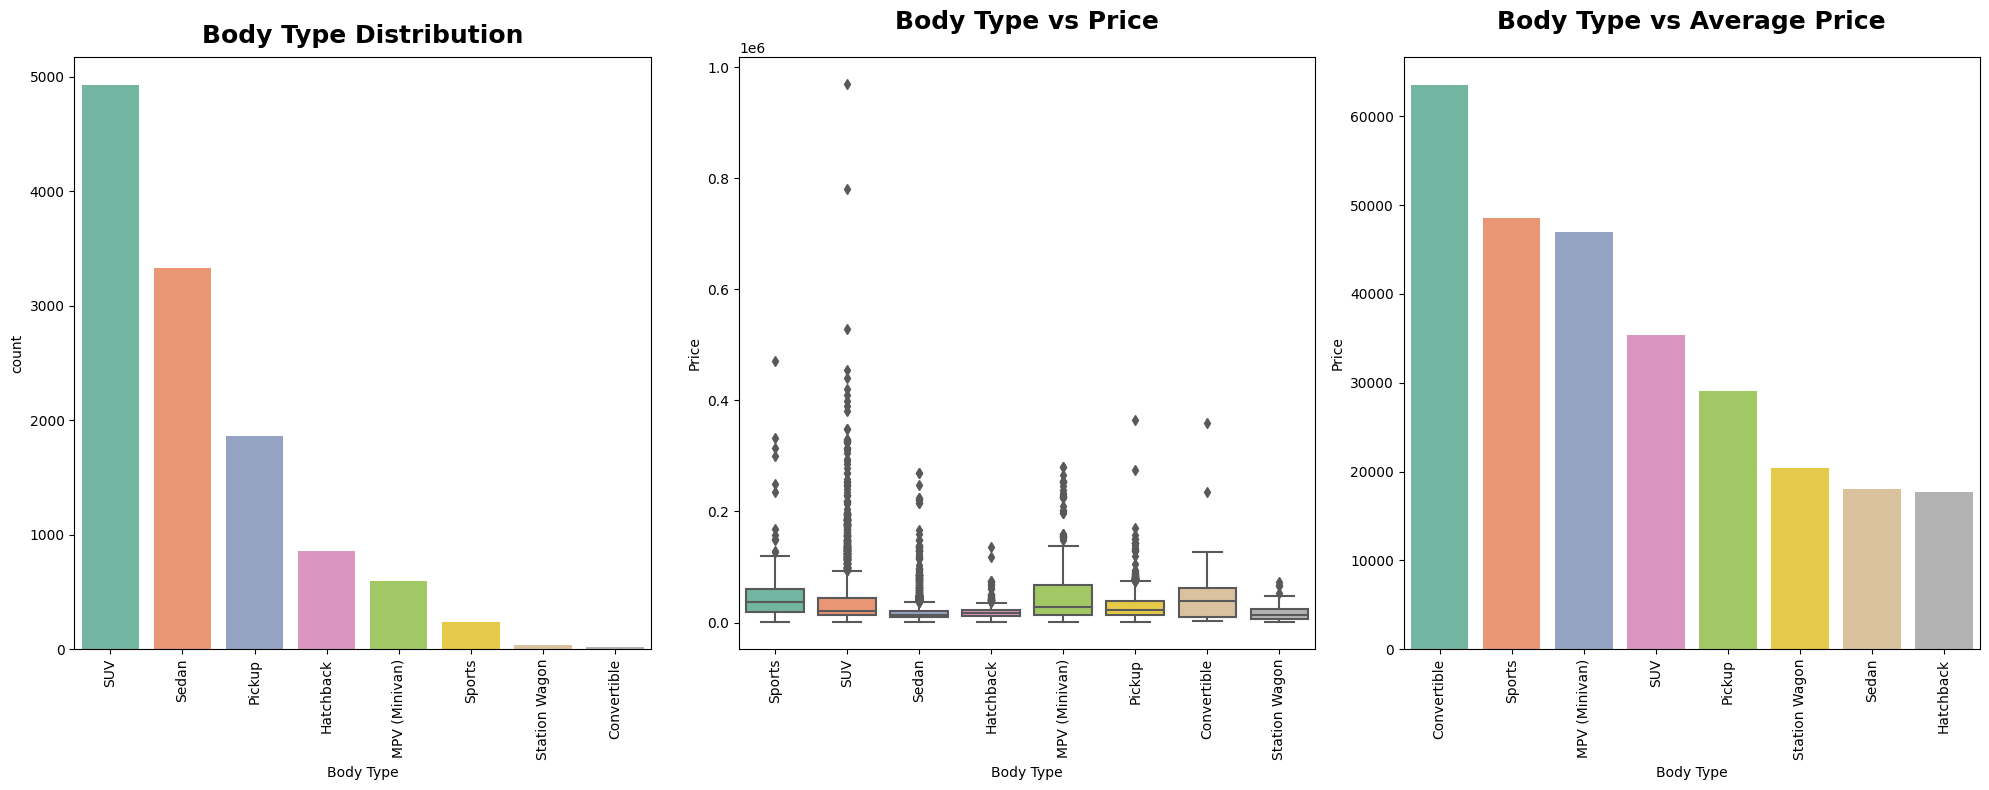

In [52]:
categorical_visualization('Body Type')

#### Obseration
1. Cars having **SUV** body-type are mostly salse followed by **Sedan**.
2. Cars having **converitble** or **hardtop** body-type are less salse.
3. Cars having **Converitble** body-type is the mostly expensive cars foolowed by **sport**.

#### Insights
1. **Convertible** & **Sport** body-type are less salse because they are very expensive cars. So most of the customers couldn't prefer it.
2. Car having **SUV** body-type is the fourth most expensive car. But still its having the most number of cars sales. So we can say customer prefer **medium price range cars**.

### 8. Visualizing Transmission Feature 

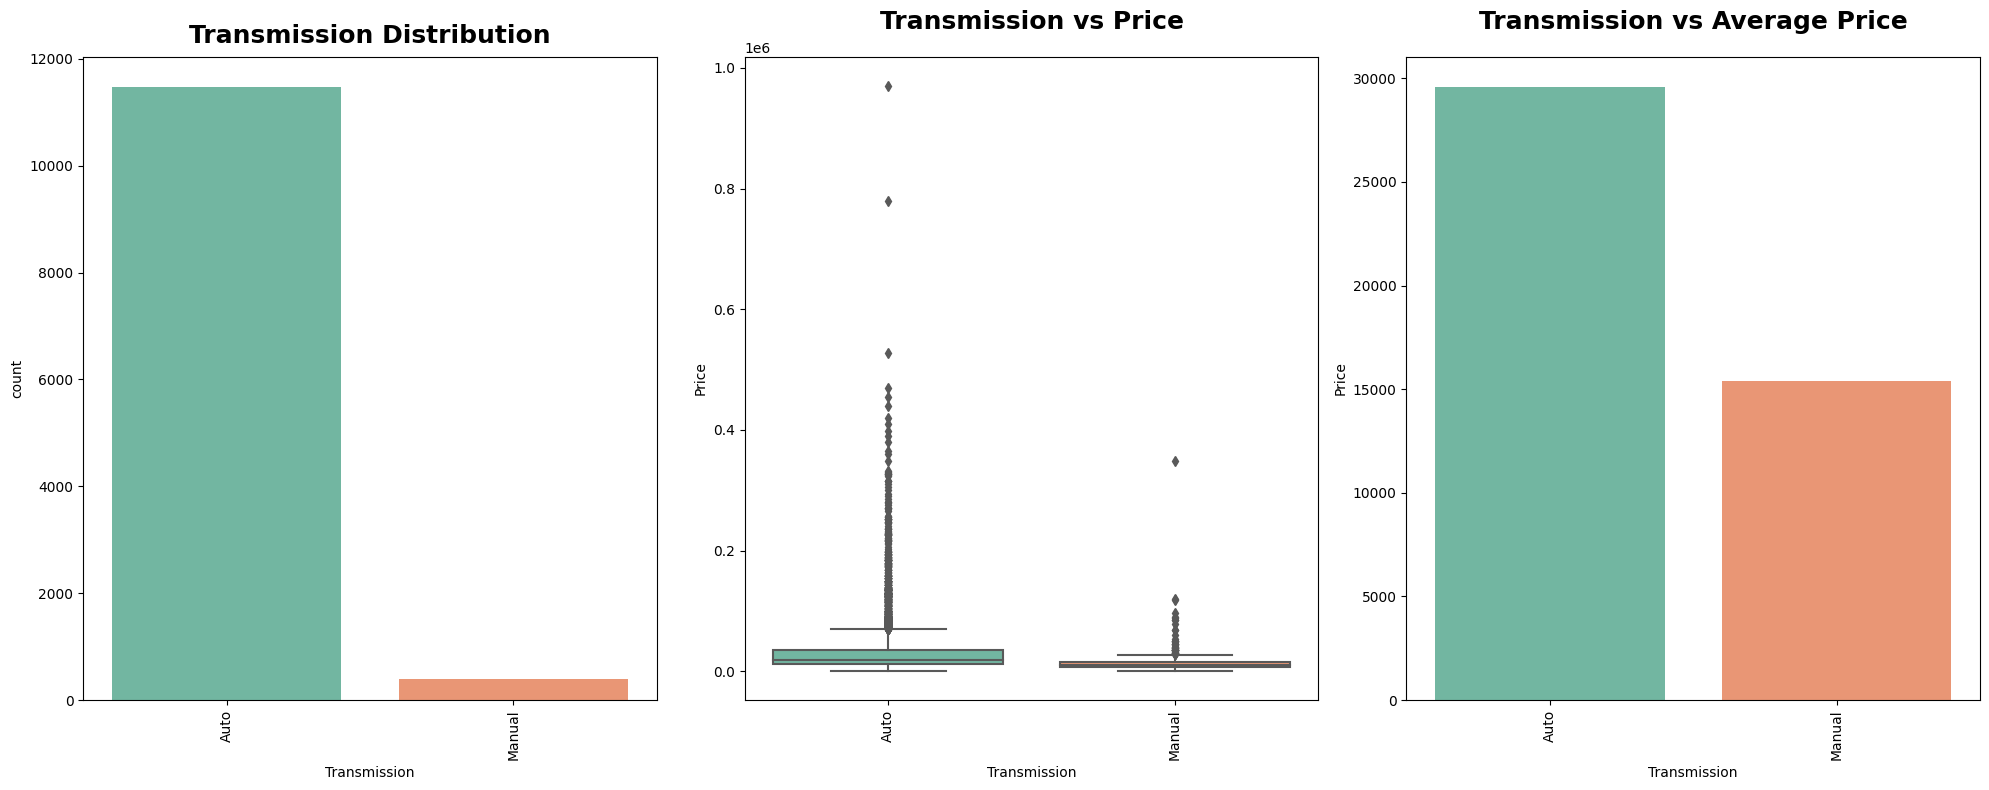

In [53]:
categorical_visualization('Transmission')

### 9. Visualizing Color Feature 

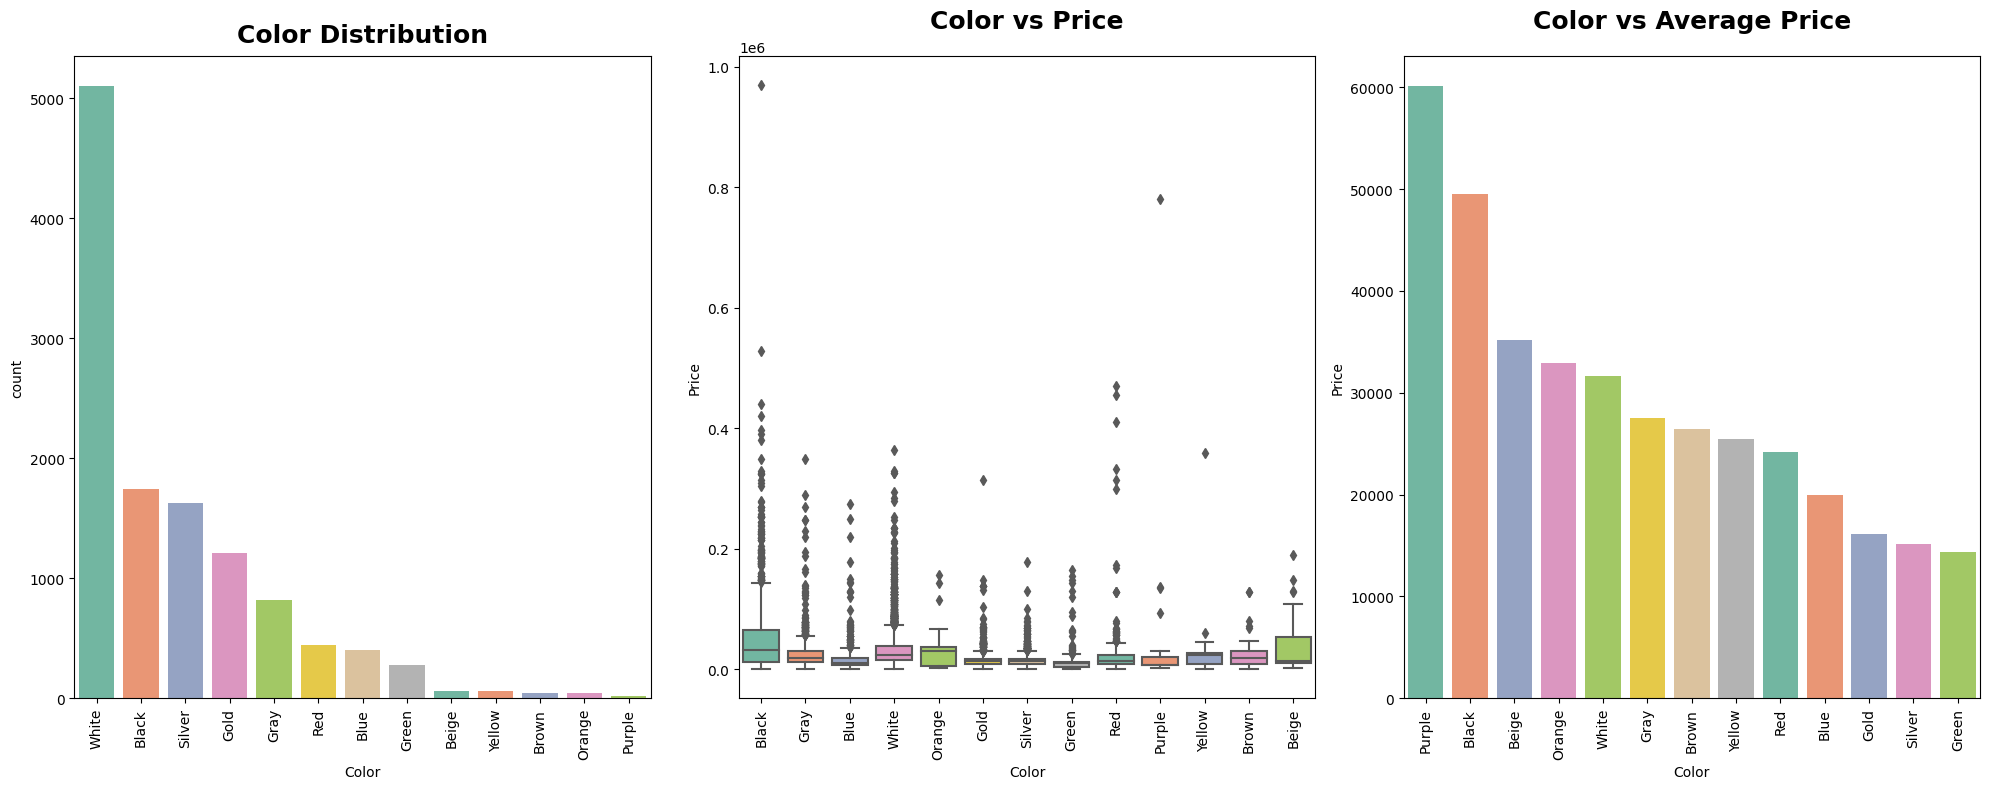

In [54]:
categorical_visualization('Color')

### 10. Visualizion Car Models Features 

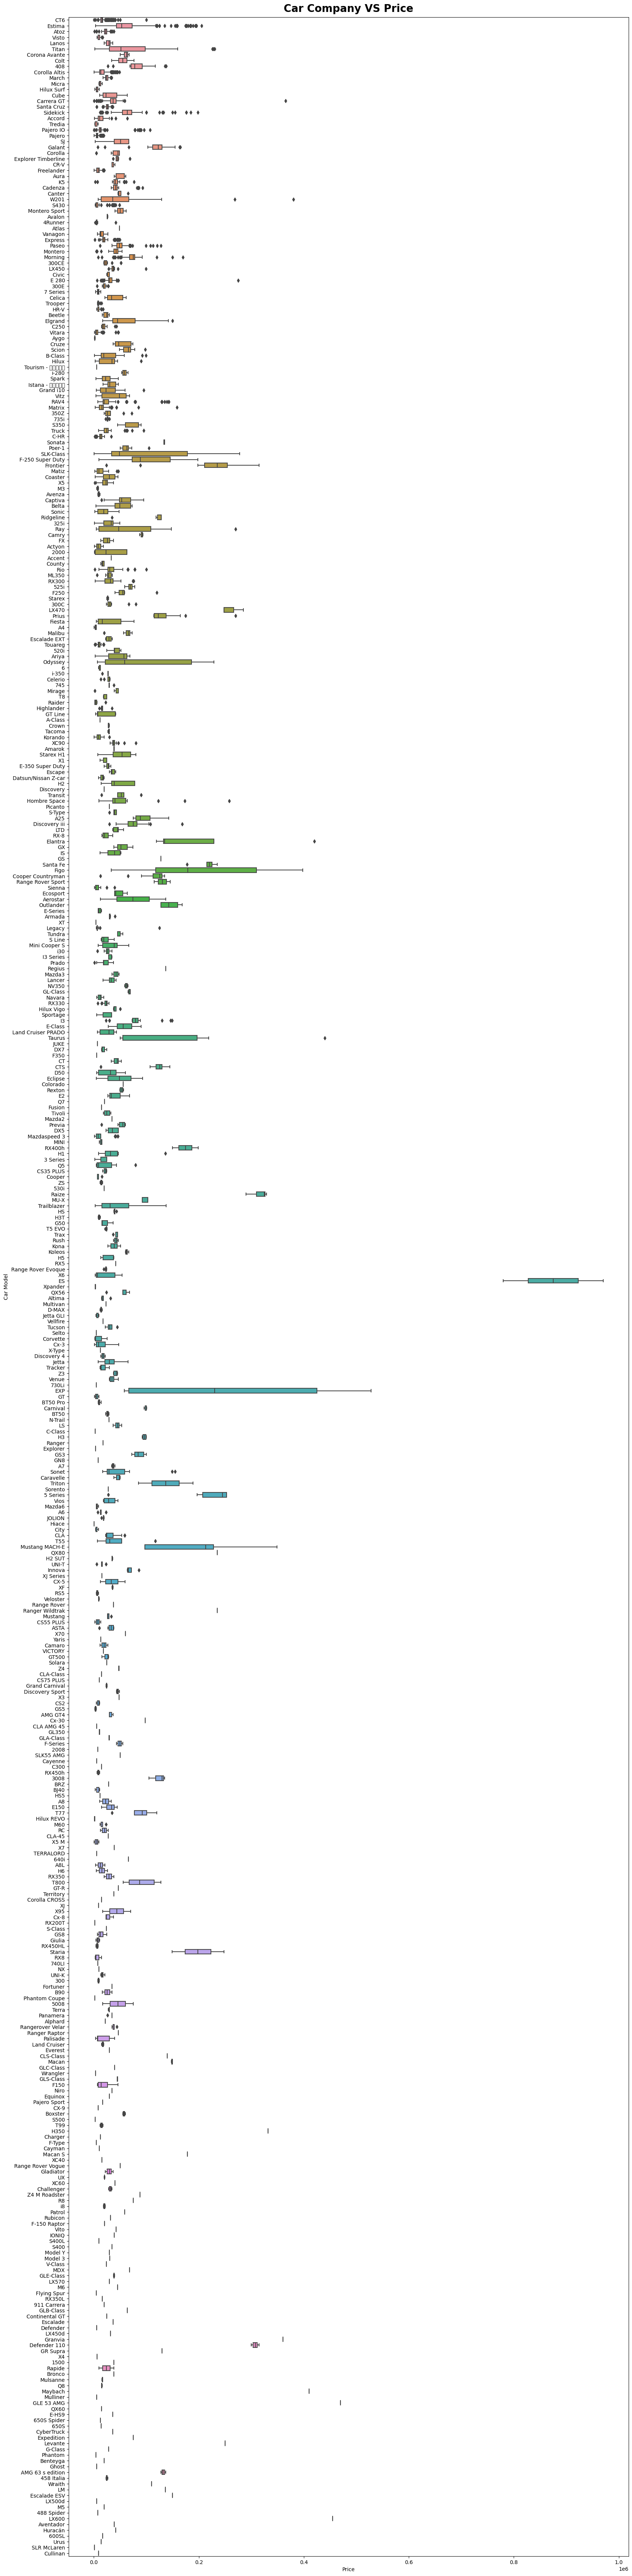

In [55]:
# Set up the plot
fig, ax = plt.subplots(figsize=(20, 80))

# Create a horizontal boxplot
sns.boxplot(x='Price', y='Car Model', data=df, orient='h', ax=ax)

# Sort the categories by median price
medians = df.groupby(['Car Model'])['Price'].median().sort_values()
category_order = medians.index.tolist()
ax.set_yticklabels(category_order)

# Add labels and adjust margins
ax.set_xlabel('Price')
ax.set_ylabel('Car Model')
ax.set_title('Car Company VS Price', pad=10, fontweight='black', fontsize=20)
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)

plt.show()

Text(0.5, 1.0, 'Car Company VS Price')

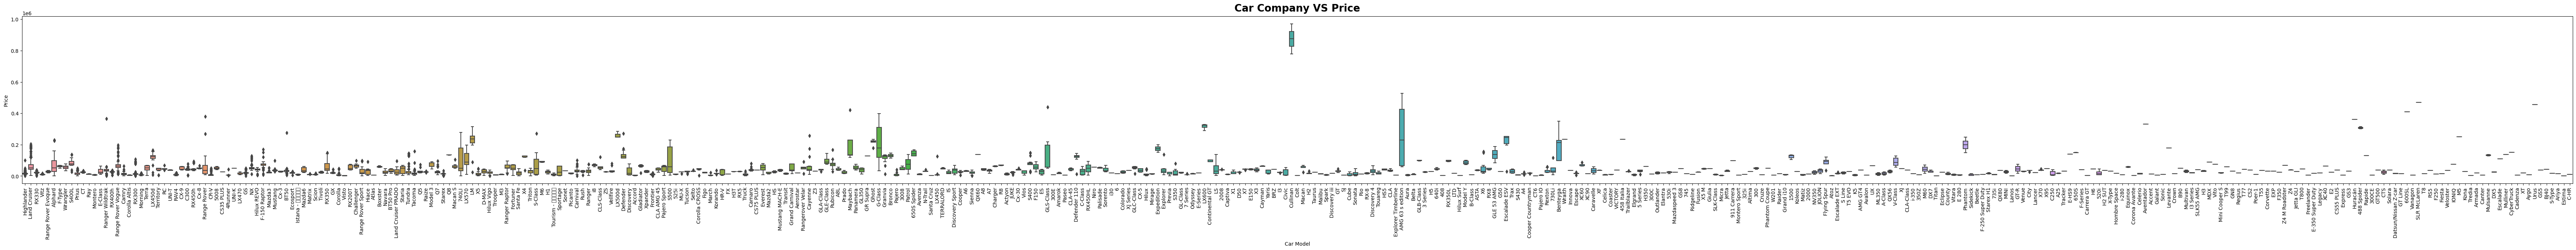

In [56]:
plt.figure(figsize = (200, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Car Model', y = 'Price', data = df, orient= 'v')
plt.xticks(rotation = 90)
plt.title('Car Company VS Price', pad = 10, fontweight = 'black', fontsize = 20)

<a id="4.2"></a>
## <span style="color:#e76f51;">Continuos and Categorical Data Distribution </span>

### 11. Visualizing Car Location Features 

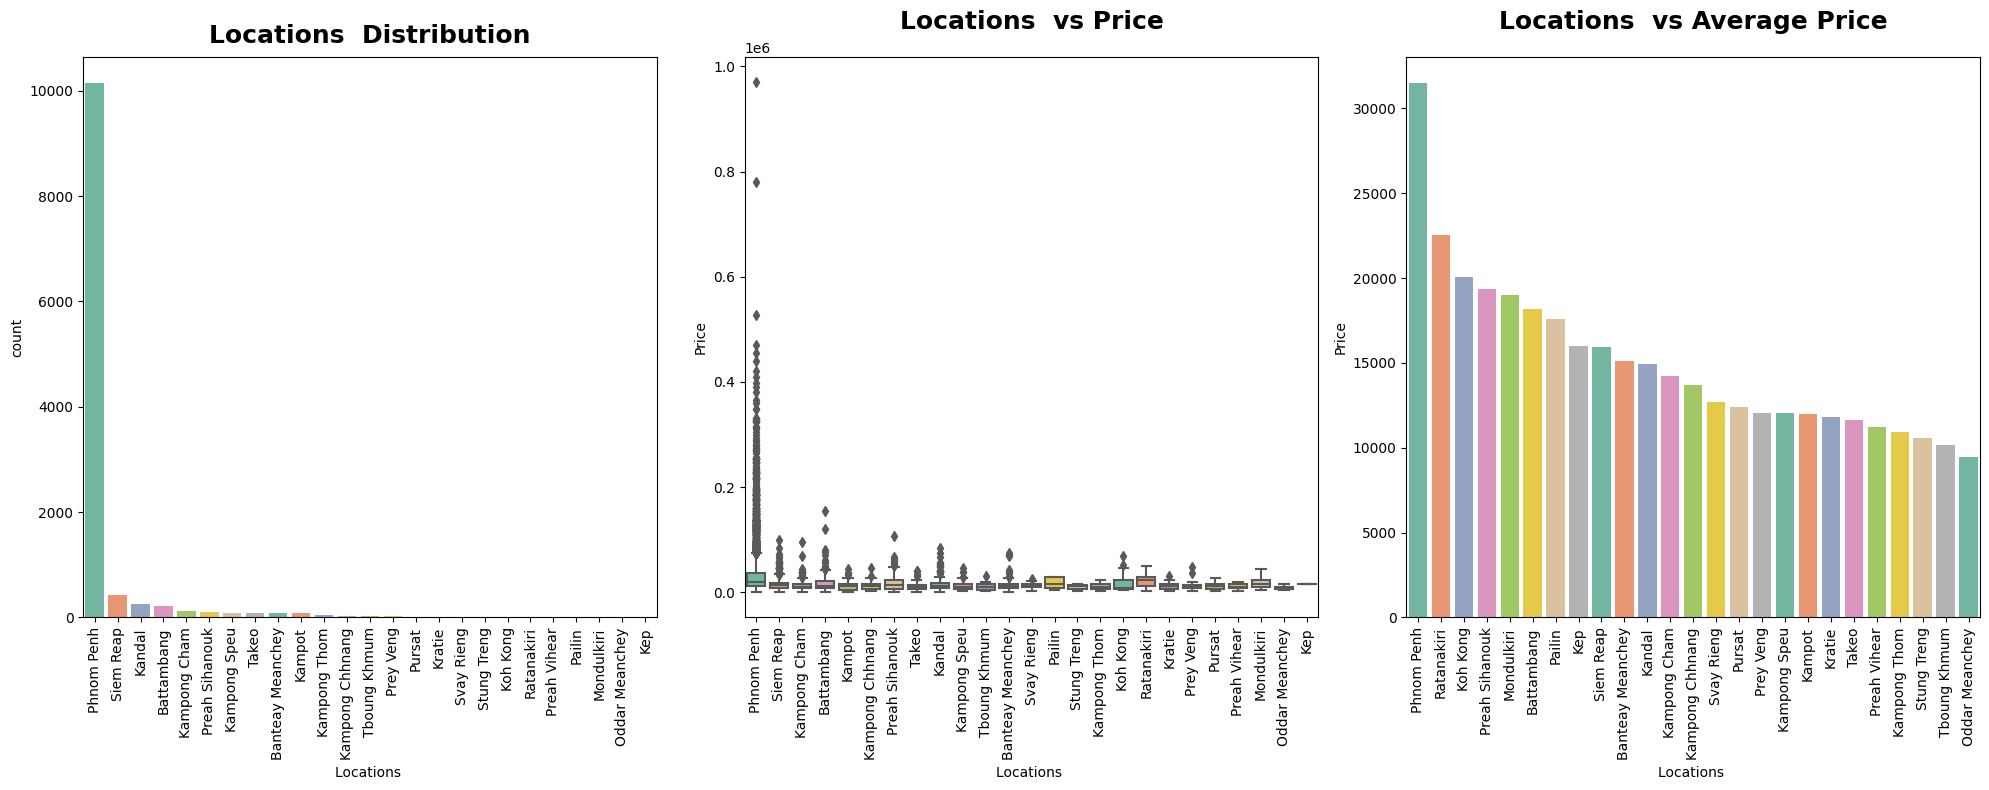

In [57]:
categorical_visualization('Locations ')

In [58]:
df_numerical.columns

Index(['Ad ID ', 'Year'], dtype='object')

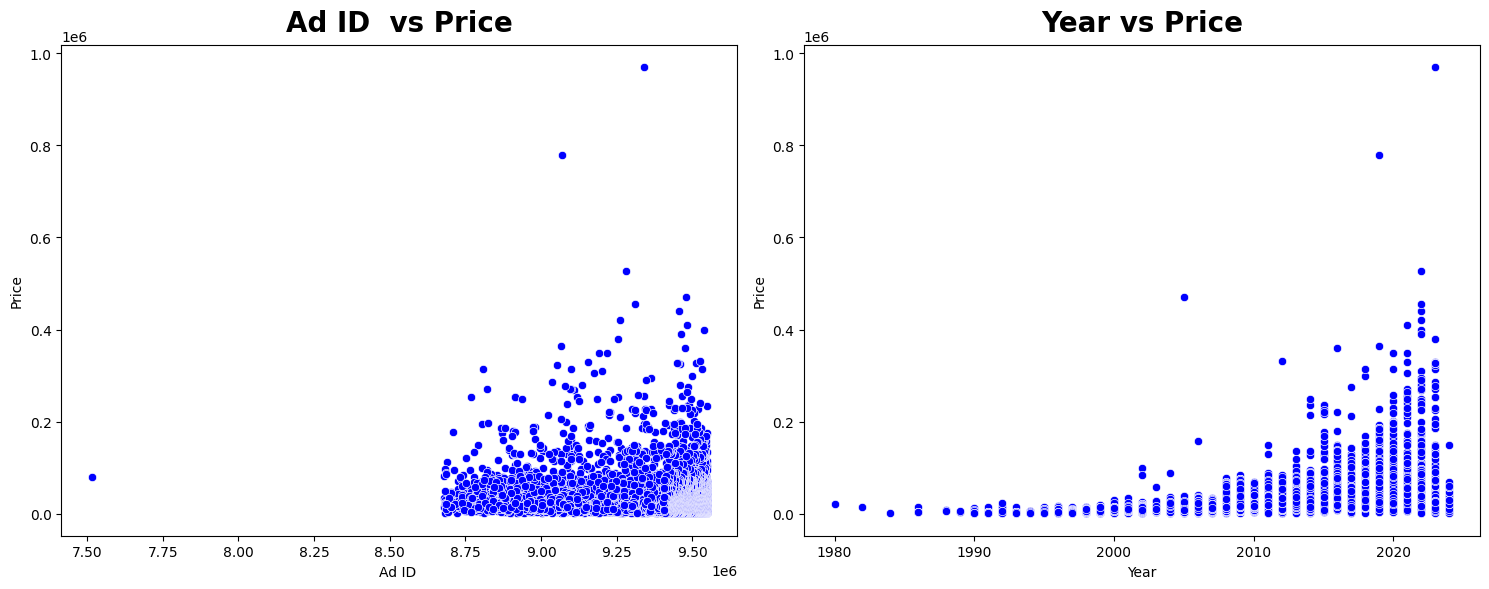

In [59]:
scatter_plot(['Ad ID ', 'Year'])

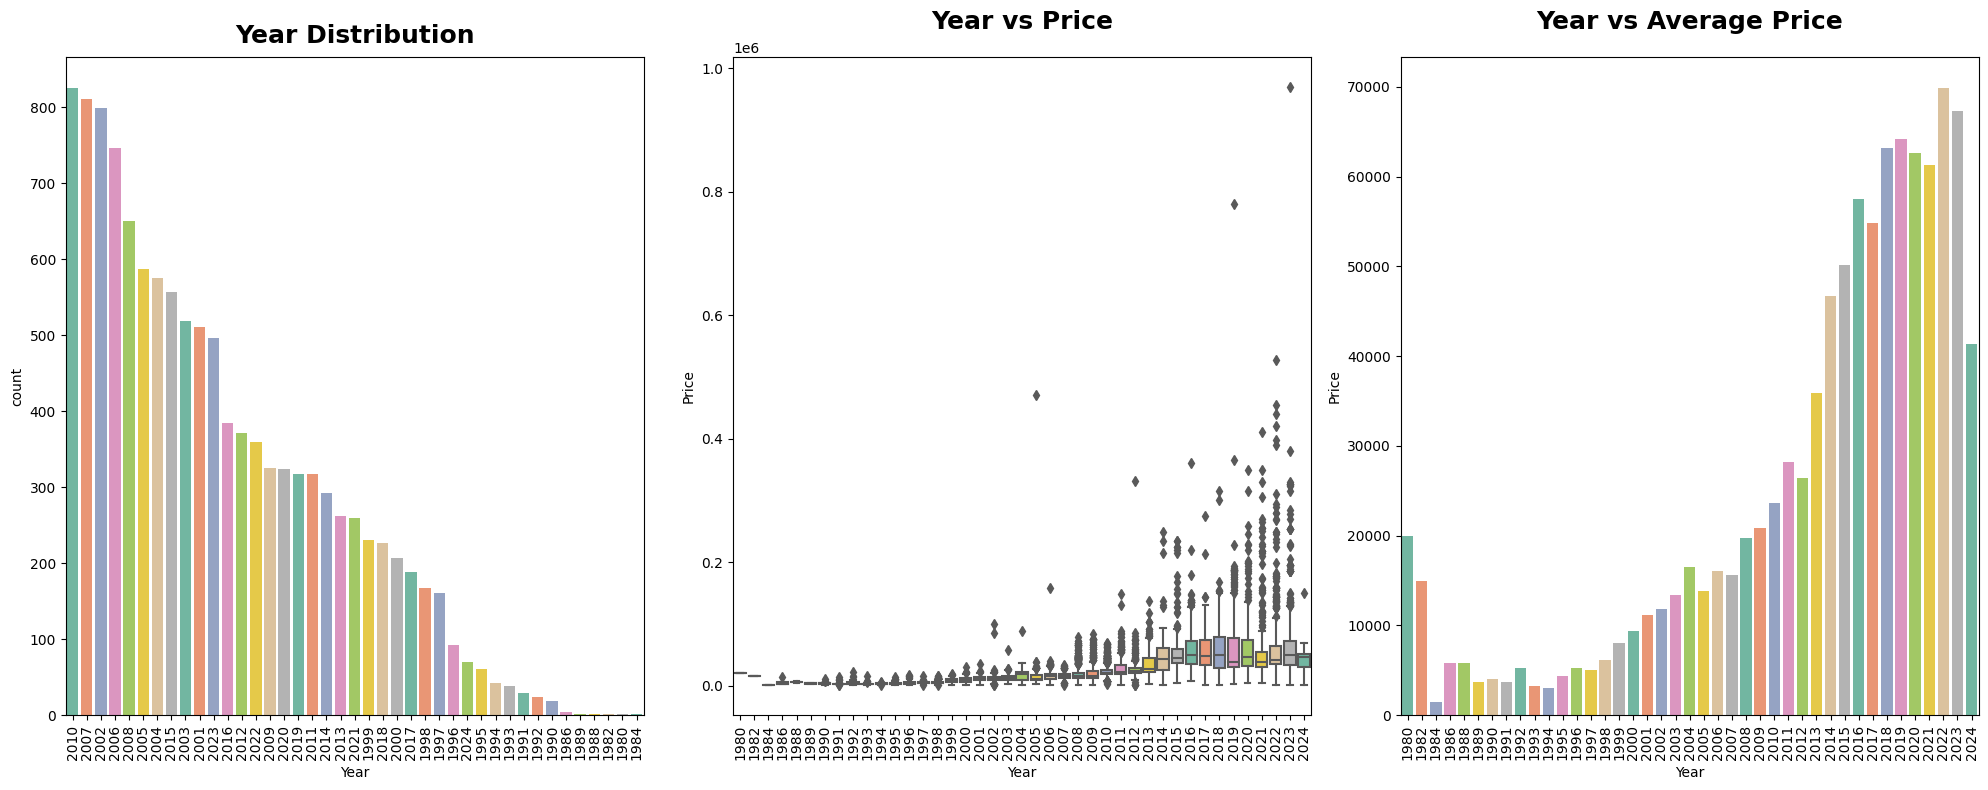

In [60]:
categorical_visualization('Year')

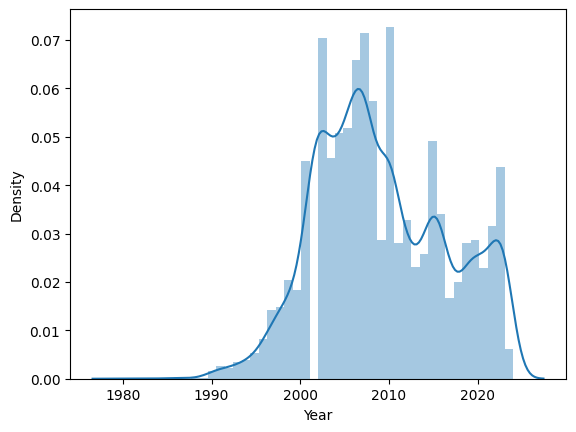

In [61]:
sns.distplot(df['Year'])
plt.show()

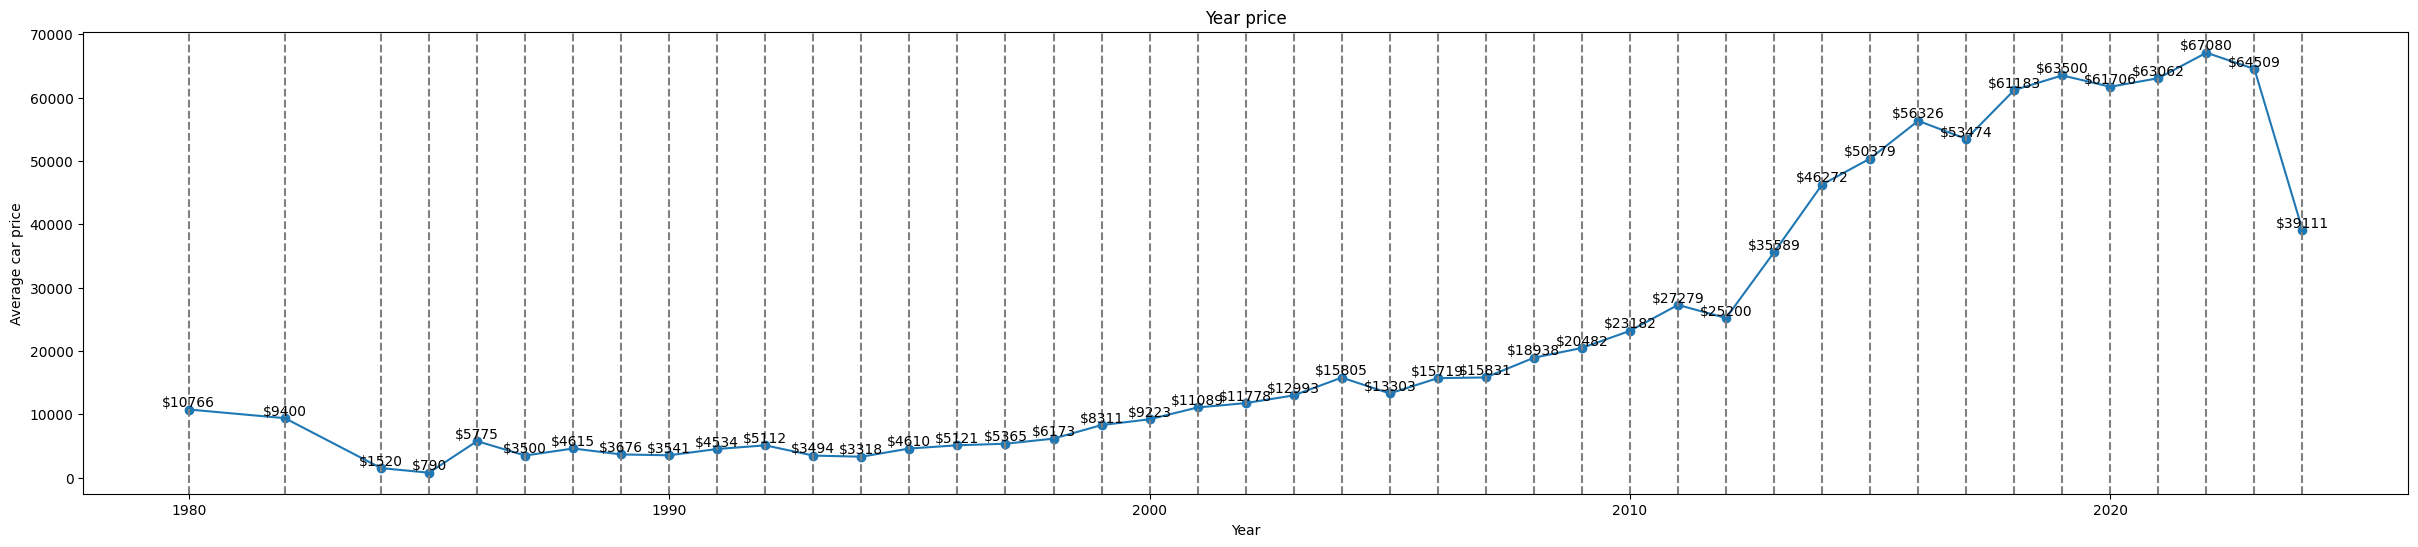

In [62]:
plt.figure(figsize=(30, 6))
mean_prices = cars.groupby('Year')['Price'].mean()

# Create a line plot with markers
mean_prices.plot(marker='o')

# Add labels to the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Average car price')
plt.title('Year price')

# Add text labels to each data point
for year, price in mean_prices.iteritems():
    plt.text(year, price, f"${price:.0f}", ha='center', va='bottom')
    plt.axvline(x=year, color='gray', linestyle='--')

plt.show()

#### Observation
 * The average prices seem to have increase from year 2012 to 2022

### 10. List of all the useful Feature

**List of all the useful Categorical Features.**
1. Location
2. Car Makes
3. Car Model
4. Tax Type
5. Condition
6. Body Type
7. Fuel
8. Transmission
9. Color

**List of all the useful Numerical Features.**
* Year
* Price

<a id="4.6"></a>
## <span style="color:#e76f51;">  Correlation matrix </span>

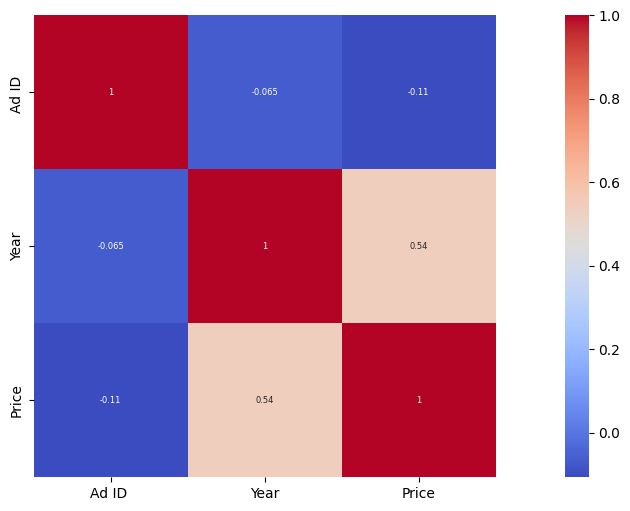

In [63]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(18,6))

sns.heatmap(cars.corr(), annot= True, square=True, ax = ax, cbar= True, annot_kws={"fontsize": 6}, cmap='coolwarm')
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '4.2'><span>Feature Engineering</span></a>
</p>
</div>

### 1. Deriving New Features From "Cars Makes" Feature. 

* As we made an insight above that we can split the car company name into different price ranges.Like **Low Range, Medium Range, High Range** cars.

In [64]:
z = round(df.groupby(['Car Makes'])['Price'].agg(['mean']), 2)
z.T

Car Makes      Acura  Alfa Romeo  Aston Martin       Audi       BAIC  \
mean      88000.0000  48000.0000   130000.0000 32690.3600 33583.3300   

Car Makes    BESTUNE        BMW        BYD     Bentley    CHANGAN  ...  \
mean      46625.0000 43694.5100 24500.0000 130470.5900 35150.0000  ...   

Car Makes  SsangYong     Subaru    Suzuki      Tesla     Toyota  Volkswagen  \
mean      14415.3800 27166.6700 8962.5000 83817.9400 21321.3900  25959.1500   

Car Makes      Volvo     WULING      ZOTYE    ZX AUTO  
mean      53799.8600 37399.5000 45500.0000 48333.3300  

[1 rows x 63 columns]

In [65]:
min, max = z.agg(['min','max']).values

In [66]:
df1 = df.merge(z, how = 'left', on = 'Car Makes')
df1.shape, df.shape

((11859, 17), (11859, 16))

In [67]:
bin_width = (min+max)/3 
bins = [i for i in range(int(24600.9100), int(np.ceil(max)), int(np.ceil(bin_width)))]
bins[-1] = int(np.ceil(max))
bins.insert(0, 0)
bins

[0, 24600, 152745, 382334]

In [68]:
cars_bin = ['Budget', 'Medium', 'Highend']
df1['CarsRange'] = pd.cut(df1['mean'], bins=bins, right=False, labels=cars_bin)
df1.head(2)

Ad ID       Category   Locations     Posted  Car Makes     Car Model  \
0  9539303  Cars for Sale  Phnom Penh  10-Jun-23    Toyota    Highlander   
1  9540392  Cars for Sale  Phnom Penh  09-Jun-23    Toyota  Land Cruiser   

   Year      Tax Type Condition Body Type    Fuel Transmission  Color  \
0  2003  Plate Number      Used    Sports  Petrol         Auto  Black   
1  2022  Plate Number      Used       SUV  Petrol         Auto  Black   

                                                Link  \
0  https://www.khmer24.com/en/cars/highlander-%E1...   
1  https://www.khmer24.com/en/cars/%E1%9E%9B%E1%9...   

                                             Title       Price       mean  \
0  Highlander ឆ្នាំ 2003 ម៉ាសុីន 4 ប៉ុង 1 ពណ័ ខ្មៅ  14000.0000 21321.3900   
1                            លក់ Land Cruiser 2022 155000.0000 21321.3900   

  CarsRange  
0    Budget  
1    Budget

**Note**
* In above output we fetched the **average price of each individual car companies**
* Now we have to add this average values a new column in our datset.

---

In [69]:
car_make_Budget = pd.DataFrame(df1[df1['CarsRange'] == 'Budget']['Car Makes'].value_counts()).index.to_list()

car_model_Budget = df[df['Car Makes'].apply(lambda x: x in car_make_Budget)]['Car Model'].value_counts().index.to_list()

df_Budget = pd.DataFrame(df[df['Car Makes'].apply(lambda x: x in car_make_Budget)].groupby(['Car Makes'])['Car Model'].value_counts()).rename(columns={'Car Model': 'Count Number'}).reset_index(level =1)

insight_range_price(car_make_Budget, car_model_Budget, df_Budget, 'Budget')


The total number of Car brands and Car models in range of Budget prices 137
The total number of Car brands in range of Budget prices 15
The total number of Car models in range of Budget prices 136


---

In [70]:
car_make_Medium = pd.DataFrame(df1[df1['CarsRange'] == 'Medium']['Car Makes'].value_counts()).index.to_list()

car_model_Medium = df[df['Car Makes'].apply(lambda x: x in car_make_Medium)]['Car Model'].value_counts().index.to_list()

df_model_Medium = pd.DataFrame(df[df['Car Makes'].apply(lambda x: x in car_make_Medium)].groupby(['Car Makes'])['Car Model'].value_counts()).rename(columns={'Car Model': 'Count Number'}).reset_index(level =1)


insight_range_price(car_make_Medium, car_model_Medium, df_model_Medium, 'Medium')


The total number of Car brands and Car models in range of Medium prices 298
The total number of Car brands in range of Medium prices 44
The total number of Car models in range of Medium prices 294


---

In [71]:
car_make_Highend= pd.DataFrame(df1[df1['CarsRange'] == 'Highend']['Car Makes'].value_counts()).index.to_list()

car_model_Highend = df[df['Car Makes'].apply(lambda x: x in car_make_Highend)]['Car Model'].value_counts().index.to_list()

df_Highend = pd.DataFrame(df[df['Car Makes'].apply(lambda x: x in car_make_Highend)].groupby(['Car Makes'])['Car Model'].value_counts()).rename(columns={'Car Model': 'Count Number'}).reset_index(level =1)

insight_range_price(car_make_Highend, car_model_Highend, df_Highend, 'Highend')


The total number of Car brands and Car models in range of Highend prices 11
The total number of Car brands in range of Highend prices 4
The total number of Car models in range of Highend prices 11


---

### 2. Create new feature to correct year 

In [72]:
from datetime import datetime

# Get the current year
current_year = datetime.today().year

new_year = df1['Year'].apply(lambda x: current_year-x)

df1['lifespan'] = new_year.values

df1.drop(columns=['Year'], inplace=True)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '5'><span>Data Preprocessiong</span></a>
</p>
</div>

### 1. Creating new DataFrame with all the useful Features.

In [73]:
new_df = df1.drop(columns=['Ad ID ', 'Category ', 'Posted ', 'Link', 'mean', 'Car Makes', 'Title', 'Car Model'], axis= 1)
new_df.describe(include=['O', 'category'])

Locations       Tax Type Condition Body Type    Fuel Transmission  \
count        11859         11859     11859     11859   11859        11859   
unique          25             2         2         8       5            2   
top     Phnom Penh  Plate Number      Used       SUV  Petrol         Auto   
freq         10140          8704      9065      4928    7595        11466   

        Color CarsRange  
count   11859     11859  
unique     13         3  
top     White    Budget  
freq     5099      7255

### 2. Dummy Encoding 

In [74]:
# Categorical Features
categorical_features_new_df = new_df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features_new_df

['Locations ',
 'Tax Type',
 'Condition',
 'Body Type',
 'Fuel',
 'Transmission',
 'Color',
 'CarsRange']

In [75]:
np.max(new_df[categorical_features_new_df].nunique().values.tolist())

25

In [76]:
new_df_dummy, col_dummy = dummy(new_df, categorical_features_new_df)
new_df_dummy.shape, col_dummy

((11859, 62),
 ['Locations ',
  'Tax Type',
  'Condition',
  'Body Type',
  'Fuel',
  'Transmission',
  'Color',
  'CarsRange'])

### 3. Handling Skewdata (Box Cox Transform)

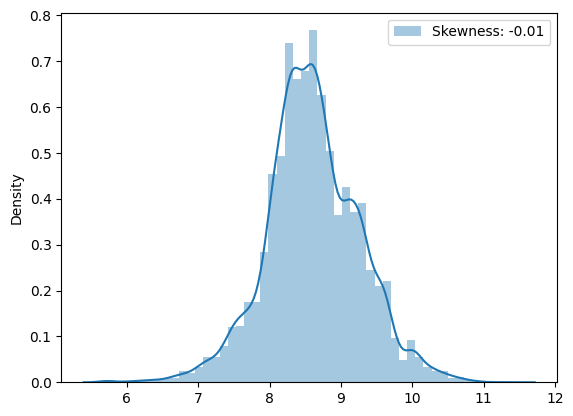

In [77]:
Price_boxcox, Price_lambda = boxcox(new_df, 'Price')

##### Insight
>Skewness is reduced from 5.27 to -0.00

In [78]:
new_df_boxcox = new_df_dummy.copy()
new_df_boxcox['Price'] = list(Price_boxcox)

new_df_boxcox.shape

(11859, 62)

### 4 Handling Outliers

The IQR is 0.8299786314742619
The lower bound value is 6.969261881134205
The upper bound value is 10.289176407031253
Total number of outliers are 225


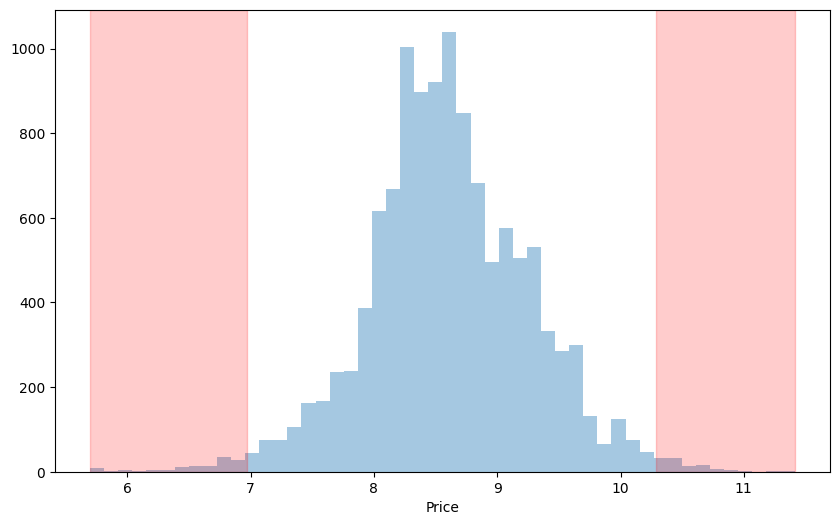

In [79]:
visulize_outlier(new_df_boxcox, 'Price')

In [80]:
outlier_index = list(outlier_detection(new_df_boxcox['Price']).index)
new_df_ro = new_df_boxcox.drop(outlier_index, axis= 'rows')
new_df_boxcox.shape[0], new_df_ro.shape[0]

(11859, 11634)

### 4. Splitting Data for Model Traning & Testing.

In [127]:
X = new_df_boxcox.drop('Price', axis= 1)
y = new_df_boxcox.Price

# X = scaler_df(X, ['lifespan'])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '6'><span>Model Building</span></a>
</p>
</div>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Linear-Regression </b> Model</h2>

In [129]:
from sklearn.linear_model import LinearRegression
model_prediction(X_train, X_test, y_train, y_test, LinearRegression(), 'Linear Regression Model', record=True)

r2_Score of LinearRegression() model on Training Data is: 68.69255851729015
r2_Score of LinearRegression() model on Testing Data is: 66.14327234848324
MSE of LinearRegression() model on Testing Data is: 0.143754329969222


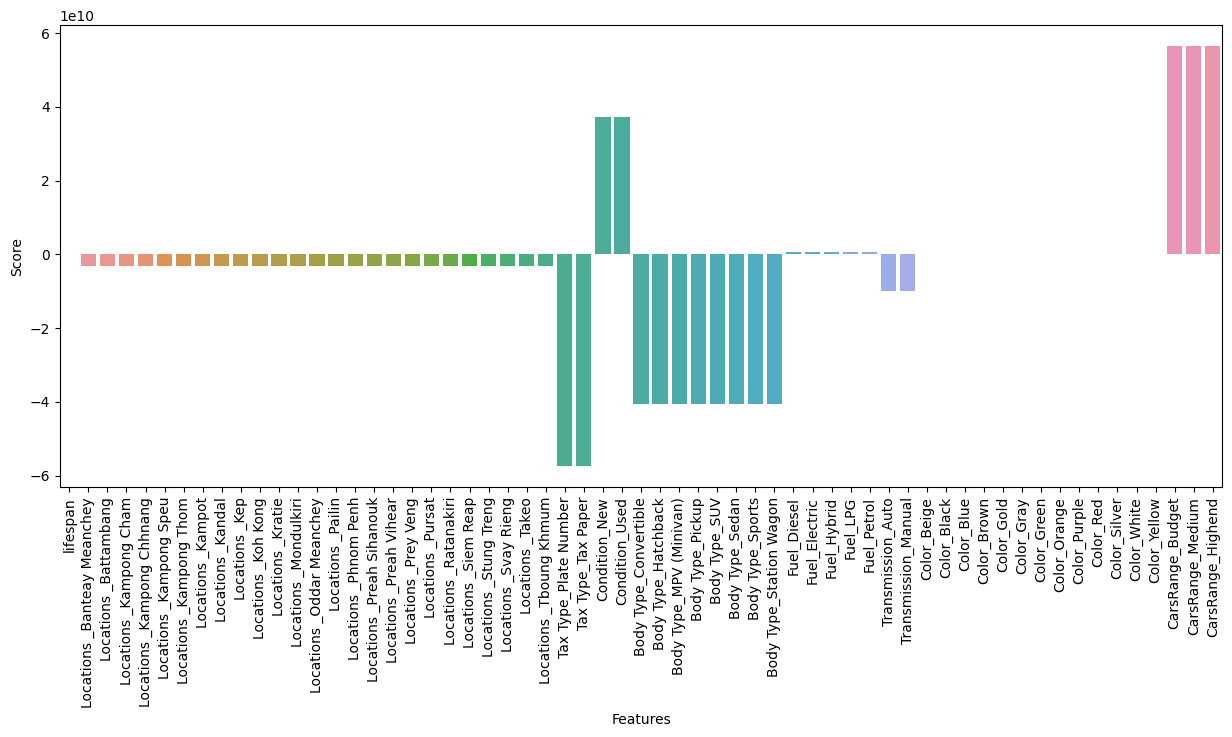

In [130]:
visualize_linear_features_importance(X_train, y_train, LinearRegression())

In [112]:
ODL_checking(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     365.8
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:18:11   Log-Likelihood:                -3737.1
No. Observations:                8894   AIC:                             7582.
Df Residuals:                    8840   BIC:                             7965.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [113]:
VIF(X_train)

Features    VIF
0     Body Type_Convertible    inf
1       Body Type_Hatchback    inf
2          Body Type_Pickup    inf
3             Body Type_SUV    inf
4           Body Type_Sedan    inf
..                      ...    ...
56  Locations _Tboung Khmum    inf
57    Tax Type_Plate Number    inf
58       Tax Type_Tax Paper    inf
59            Condition_New    inf
60                 lifespan 1.6800

[61 rows x 2 columns]

In [114]:
X_train_new = drop_high_pvalue_features(X_train, y_train)
ODL_checking(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     645.0
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:18:14   Log-Likelihood:                -3751.3
No. Observations:                8894   AIC:                             7565.
Df Residuals:                    8863   BIC:                             7785.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

In [115]:
VIF(X_train_new)

Features     VIF
0               Fuel_Petrol     inf
1          Body Type_Sports     inf
2          CarsRange_Medium     inf
3          CarsRange_Budget     inf
4       Transmission_Manual     inf
5         Transmission_Auto     inf
6                  Fuel_LPG     inf
7               Fuel_Hybrid     inf
8             Fuel_Electric     inf
9               Fuel_Diesel     inf
10  Body Type_Station Wagon     inf
11        CarsRange_Highend     inf
12          Body Type_Sedan     inf
13            Body Type_SUV     inf
14         Body Type_Pickup     inf
15  Body Type_MPV (Minivan)     inf
16      Body Type_Hatchback     inf
17    Body Type_Convertible     inf
18    Tax Type_Plate Number     inf
19           Condition_Used     inf
20            Condition_New     inf
21       Tax Type_Tax Paper     inf
22              Color_White 47.1300
23              Color_Black 24.7700
24             Color_Silver 23.2600
25               Color_Gold 18.3000
26               Color_Gray 12.9400
27                Color_Red  7.9200
28               Color_Blue  6.8400
29              Color_Green  5.4300
30              Color_Beige  2.1200
31             Color_Orange  1.7500
32              Color_Brown  1.6800
33                 lifespan  1.6700
34             Color_Purple  1.3800
35    Locations _Phnom Penh  1.1100

In [116]:
X_train_new1 = drop_high_vif_features(X_train_new)
VIF(X_train_new1)

Features    VIF
0          Body Type_Sports 1.0800
1                  Fuel_LPG 1.0700
2             Fuel_Electric 1.0600
3               Color_Green 1.0600
4               Color_Beige 1.0200
5              Color_Orange 1.0200
6         CarsRange_Highend 1.0100
7              Color_Purple 1.0100
8   Body Type_Station Wagon 1.0100
9               Color_Brown 1.0100
10  Body Type_MPV (Minivan) 0.5000
11                Color_Red 0.2700
12      Body Type_Hatchback 0.2400
13             Color_Silver 0.2100
14      Transmission_Manual 0.1900
15               Color_Gold 0.1800
16              Fuel_Hybrid 0.1800
17               Color_Gray 0.1700
18          Body Type_Sedan 0.1600
19           Condition_Used 0.1300
20         Body Type_Pickup 0.1200
21               Color_Blue 0.1100
22    Locations _Phnom Penh 0.1100
23              Fuel_Petrol 0.0700
24         CarsRange_Medium 0.0700
25              Color_Black 0.0400
26       Tax Type_Tax Paper 0.0100

In [117]:
model_prediction(X_train_new1, X_test[X_train_new1.columns.tolist()], y_train, y_test, LinearRegression(), 'Linear Regression')

r2_Score of LinearRegression() model on Training Data is: 42.53191082181086
r2_Score of LinearRegression() model on Testing Data is: 42.186102205543705
MSE of LinearRegression() model on Testing Data is: 0.2454755292919993


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. Ridge Regressor </b> Model</h2>

r2_Score of Ridge(alpha=2.2229964825261956) model on Training Data is: 68.68038530548951
r2_Score of Ridge(alpha=2.2229964825261956) model on Testing Data is: 66.1939031656212
MSE of Ridge(alpha=2.2229964825261956) model on Testing Data is: 0.14353935351702685


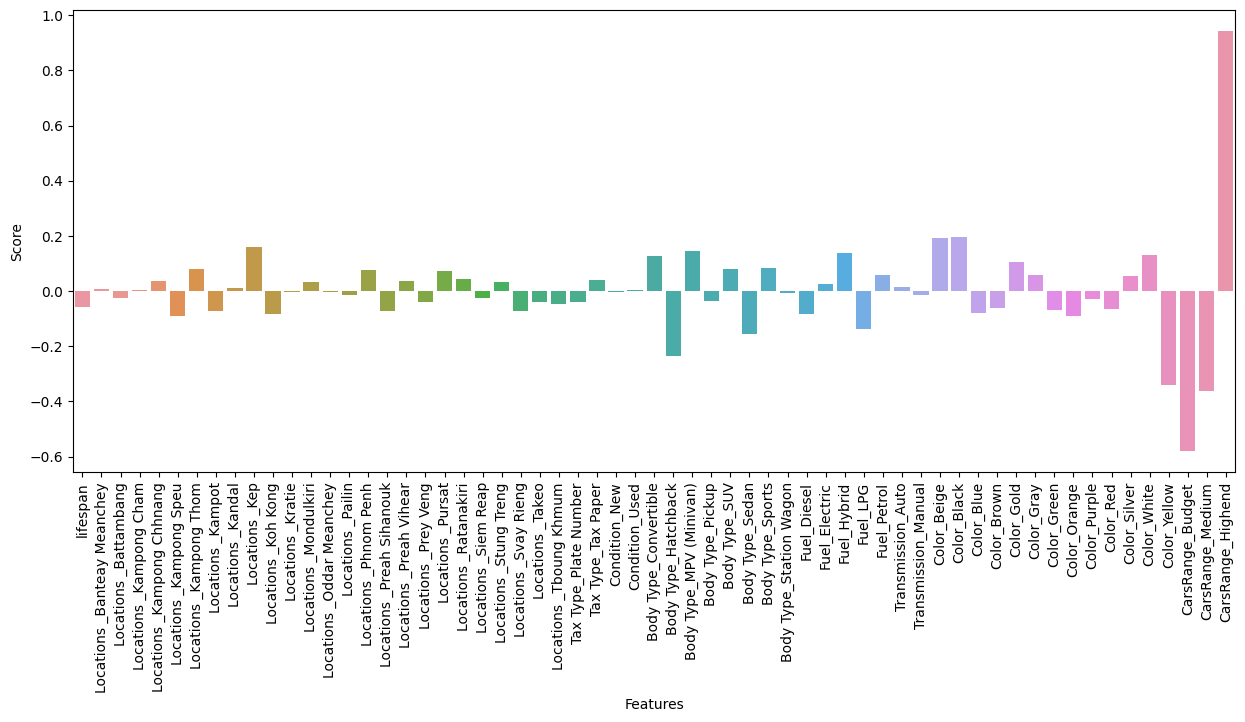

In [118]:
from sklearn.linear_model import Ridge, RidgeCV

ridgecv = RidgeCV(alphas=np.logspace(-2, 3, num=50))
ridgecv.fit(X_train, y_train)
alpha = ridgecv.alpha_
model_prediction(X_train, X_test, y_train, y_test, Ridge(alpha=alpha), 'Ridge Regression Model',  record=True)
visualize_linear_features_importance(X_train, y_train, Ridge(alpha=alpha))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Lasso Regressor </b> Model</h2>

r2_Score of Lasso(alpha=0.01) model on Training Data is: 65.07215654606262
r2_Score of Lasso(alpha=0.01) model on Testing Data is: 62.96104049669046
MSE of Lasso(alpha=0.01) model on Testing Data is: 0.15726596087371356


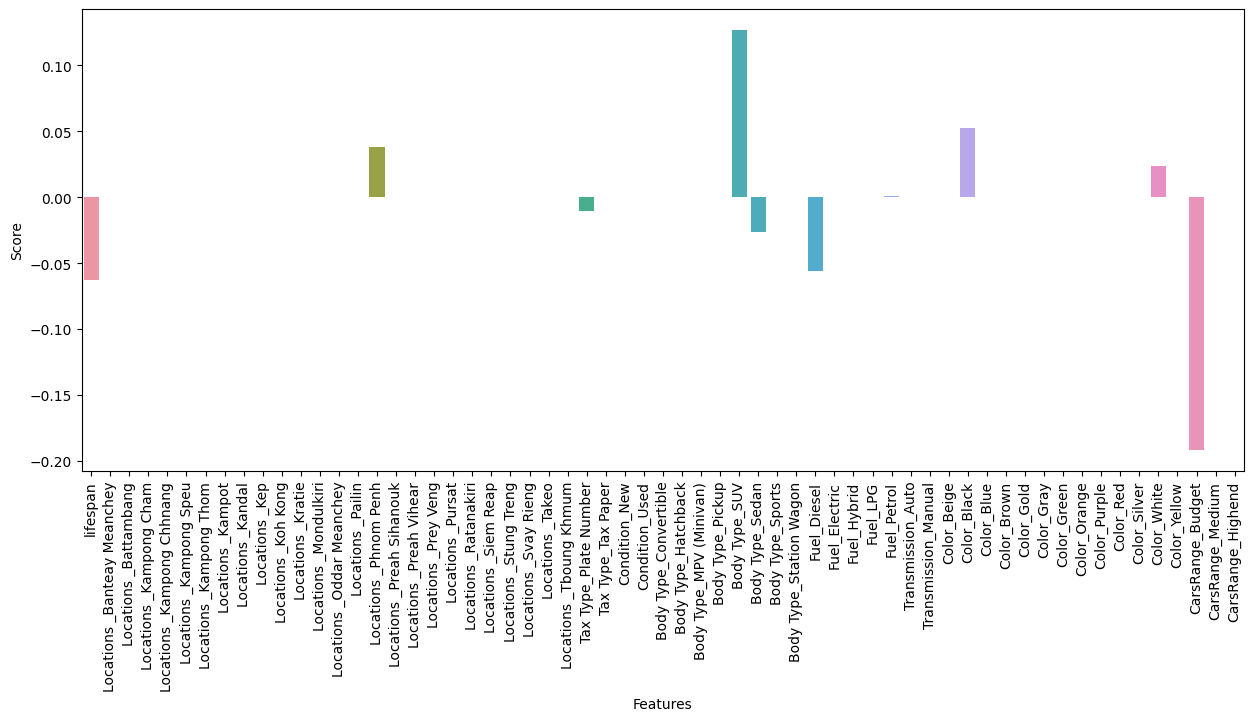

In [119]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-2, 3, num=50))
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_
model_prediction(X_train, X_test, y_train, y_test, Lasso(alpha=alpha), 'Lasso Regresion Model',  record=True)

visualize_linear_features_importance(X_train, y_train, Lasso(alpha=alpha))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
All Model Performance Comparison
</p>
</div>

In [120]:
df_model = pd.DataFrame.from_dict(Algorithms)
df_model

Training Score  Testing Score               Algorithms
0         68.6840        66.1456  Linear Regression Model
1         68.6840        66.1456  Linear Regression Model
2         68.6703        66.1096  Linear Regression Model
3         68.6920        66.1509   Ridge Regression Model
4         68.0999        65.6792    Lasso Regresion Model
5         68.6926        66.1433  Linear Regression Model
6         68.6804        66.1939   Ridge Regression Model
7         65.0722        62.9610    Lasso Regresion Model

### Plotting above results using column-bar chart.

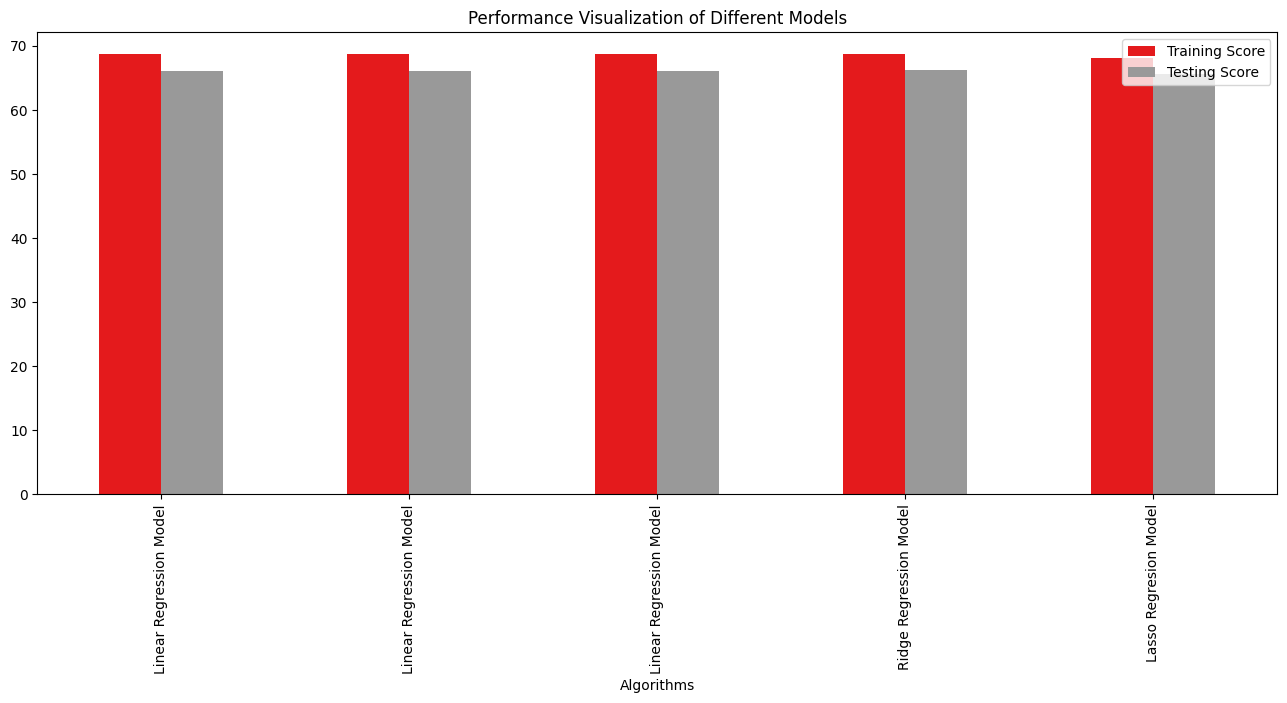

In [107]:
df_model.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Conclusion
</p>
</div>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>